# COVID-19 analysis

- <https://github.com/Kamaropoulos/covid19py>

Note that the JHU data source is not providing recovery data at this time ([reference](https://github.com/ExpDev07/coronavirus-tracker-api/blob/master/README.md#recovered-cases-showing-0)).

Another source of data might be the following: <https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data>

## data sources

```Bash
mkdir COVID19
cd COVID19
virtualenv -p python3.6 COVID19
source COVID19/bin/activate
pip3.6 install pip --upgrade
pip3.6 install jupyter matplotlib numpy pandas requests seaborn
pip3.6 install COVID19Py
python3.6
```

```Python
import COVID19Py
import numpy as np
import pandas as pd

import json
import pickle
from uuid import uuid4

def uuid4_short():
    return str(uuid4()).split('-')[0]

def new_filename(ext='.pkl', verbose=True):
    filename = uuid4_short()+ext
    if verbose:
        print(filename)
    return filename

# 2020-09-06T1846Z default API https://coronavirus-tracker-api.herokuapp.com/v2 down,
# alternative https://covid-tracker-us.herokuapp.com/v2 up
covid19 = COVID19Py.COVID19('https://covid-tracker-us.herokuapp.com')
data = covid19.getAll(timelines=True)

with open(new_filename(), 'wb') as f:
    pickle.dump(data, f)
```

In [1]:
import json
import pickle
from uuid import uuid4
import warnings

import COVID19Py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['axes.labelcolor'] = (1, 1, 1, 0)
pd.set_option("display.max_rows"   , 1000)
pd.set_option("display.max_columns", 1000)
sns.set_palette('husl')
sns.set(style='ticks')
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = [13, 6]
sns.set()

In [3]:
def uuid4_short():
    return str(uuid4()).split('-')[0]
def new_filename(ext='.pkl', verbose=True):
    filename = uuid4_short()+ext
    if verbose: print(filename)
    return filename

In [4]:
%%time
if 0:
    covid19 = COVID19Py.COVID19(data_source='jhu') # https://github.com/CSSEGISandData/COVID-19
    with open(new_filename(), 'wb') as f:
        pickle.dump(data, f)
    data = covid19.getAll(timelines=True)
    with open(new_filename(), 'wb') as f:
        pickle.dump(data, f)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.29 µs


In [5]:
if 1:
    #with open('12338731.pkl', 'rb') as f:
    #    covid19 = pickle.load(f)
    with open('7f638ee4.pkl', 'rb') as f:
        data = pickle.load(f)
    # records:
    # 2020-11-20T1543Z data: 4a365ac5.pkl
    # 2020-11-12T2008Z data: 7f638ee4.pkl
    # 2020-11-08T1558Z data: 621718d3.pkl
    # 2020-11-08T0255Z data: a23eff06.pkl
    # 2020-11-03T0101Z data: 72a3f4db.pkl
    # 2020-10-28T1139Z data: 7c322f53.pkl
    # 2020-10-21T1343Z data: 173b7204.pkl
    # 2020-10-14T1146Z data: 1678e786.pkl
    # 2020-10-02T0750Z data: 6034799e.pkl
    # 2020-09-06T1848Z data: e3e48d96.pkl
    # 2020-07-30T1354Z data: c6b11935.pkl
    # 2020-07-15T1438Z data: 02afa4cd.pkl
    # 2020-06-22T1249Z data: 2fa5652b.pkl
    # 2020-06-20T0529Z data: 30a2be6c.pkl
    # 2020-06-03T0604Z data: 3349596c.pkl
    # 2020-05-30T0158Z data: 74ef0466.pkl
    # 2020-05-25T0106Z data: a7180674.pkl
    # 2020-05-18T1412Z data: 411d8cc3.pkl
    # 2020-05-11T1410Z data: 6d5e6f10.pkl
    # 2020-05-03T1505Z data: b3e37289.pkl
    # 2020-04-30T1228Z data: e755d4a0.pkl
    # 2020-04-27T1146Z data: 9986b353.pkl
    # 2020-04-25T0122Z data: edd11ae3.pkl
    # 2020-04-23T1127Z data: d3284a31.pkl
    # 2020-04-19T1002Z data: c3733293.pkl
    # 2020-04-18T0918Z data: 289efaac.pkl
    # 2020-04-17T0818Z data: 13921a54.pkl
    # 2020-04-16T0745Z data: a0c99473.pkl
    # 2020-04-14T0844Z data: ad724da4.pkl
    # 2020-04-13T2005Z data: 65882db6.pkl
    # 2020-04-12T0527z data: d5fb657f.pkl
    # 2020-04-11T2322Z data: 2ed0a4f8.pkl
    # 2020-04-10T1904Z data: 7a48429f.pkl
    # 2020-04-09T0544Z data: 5f3d2ff9.pkl
    # 2020-04-08T0616Z data: 741cd4d4.pkl
    # 2020-04-07       data: 120141ce.pkl

#latest = covid19.getLatest()
#locations = covid19.getLocations(timelines=True)

df = pd.DataFrame(data['locations'])
df.head()
#df

id      country country_code  country_population province  \
0   0  Afghanistan           AF          37172386.0            
1   1      Albania           AL           2866376.0            
2   2      Algeria           DZ          42228429.0            
3   3      Andorra           AD             77006.0            
4   4       Angola           AO          30809762.0            

                  last_updated  \
0  2020-11-12T20:04:50.341279Z   
1  2020-11-12T20:04:50.373479Z   
2  2020-11-12T20:04:50.402834Z   
3  2020-11-12T20:04:50.430839Z   
4  2020-11-12T20:04:50.460803Z   

                                         coordinates  \
0  {'latitude': '33.93911', 'longitude': '67.7099...   
1    {'latitude': '41.1533', 'longitude': '20.1683'}   
2     {'latitude': '28.0339', 'longitude': '1.6596'}   
3     {'latitude': '42.5063', 'longitude': '1.5218'}   
4   {'latitude': '-11.2027', 'longitude': '17.8739'}   

                                              latest  \
0  {'confirmed': 42609, 'deaths': 1581, 'recovere...   
1  {'confirmed': 25801, 'deaths': 590, 'recovered...   
2  {'confirmed': 64257, 'deaths': 2093, 'recovere...   
3  {'confirmed': 5567, 'deaths': 75, 'recovered':...   
4  {'confirmed': 12953, 'deaths': 312, 'recovered...   

                                           timelines  
0  {'confirmed': {'timeline': {'2020-01-22T00:00:...  
1  {'confirmed': {'timeline': {'2020-01-22T00:00:...  
2  {'confirmed': {'timeline': {'2020-01-22T00:00:...  
3  {'confirmed': {'timeline': {'2020-01-22T00:00:...  
4  {'confirmed': {'timeline': {'2020-01-22T00:00:...

In [6]:
print(list(dict.fromkeys(list(df['country'].values))))

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indones

In [7]:
locations = {}

def process(location):
    location = location['timelines'].values[0]

    confirmed = pd.DataFrame(list(location['confirmed']['timeline'].items()), columns=['datetime', 'confirmed'])
    deaths    = pd.DataFrame(list(location['deaths']['timeline'].items()),    columns=['datetime', 'deaths'])
    recovered = pd.DataFrame(list(location['recovered']['timeline'].items()), columns=['datetime', 'recovered'])

    confirmed.index = pd.to_datetime(confirmed['datetime']); del confirmed['datetime']
    deaths.index    = pd.to_datetime(deaths['datetime'])   ; del deaths['datetime']
    recovered.index = pd.to_datetime(recovered['datetime']); del recovered['datetime']

    # merge
    location = confirmed
    location['deaths']       = deaths['deaths']
    location['recovered']    = recovered['recovered']

    # visual estimate of changes (with linear interpolation)
    half_mean_of_confirmed_cases = location['confirmed'].mean()/2
    half_mean_of_deaths_cases    = location['deaths'].mean()/2
    location['confirmed_percentage_change']                                     = location['confirmed'].pct_change().replace(0, np.nan).interpolate(method='nearest')
    location['confirmed_percentage_change']                                     = 100*location['confirmed_percentage_change']
    location['confirmed_percentage_change_by_half_mean_confirmed_cases_factor'] = half_mean_of_confirmed_cases*location['confirmed_percentage_change']
    location['deaths_percentage_change']                                        = location['deaths'].pct_change().replace(0, np.nan).interpolate(method='nearest')
    location['deaths_percentage_change']                                        = 100*location['deaths_percentage_change']
    location['deaths_percentage_change_by_half_mean_deaths_cases_factor']       = half_mean_of_confirmed_cases*location['deaths_percentage_change']    

    _location = location
    _location = _location.diff(axis=1)
    location['confirmed_new_cases']  = location['confirmed'].diff(periods=1).replace(0, np.nan).interpolate(method='nearest').interpolate(method='nearest')
    location['deaths_new_cases']     = location['deaths'].diff(periods=1).replace(0, np.nan).interpolate(method='nearest').interpolate(method='nearest')

    # reindex to first confirmed case
    location = location.query('confirmed > 0').reset_index(); del location['datetime']

    display(location.tail())

    #plots
    df_plot = location.drop([
        'confirmed_percentage_change',
        'confirmed_percentage_change_by_half_mean_confirmed_cases_factor',
        'deaths_percentage_change',
        'deaths_percentage_change_by_half_mean_deaths_cases_factor'], axis=1)
    df_plot.plot(title=location_name+' confirmed cases and deaths (linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))                   ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
    df_plot.plot(title=location_name+' confirmed cases and deaths (log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5))           ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

    df_plot = location[['confirmed_percentage_change', 'deaths_percentage_change']]
    df_plot.plot(title=location_name+' percentage change in cases and deaths (linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');
    df_plot.plot(title=location_name+' percentage change in cases and deaths (log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');

    df_plot = location[['confirmed_new_cases', 'deaths_new_cases']]
    df_plot.plot(title=location_name+' change in cases and deaths (linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('new cases');
    df_plot.plot(title=location_name+' change in cases and deaths (log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('new cases');

    return location

# South Korea

confirmed  deaths recovered  confirmed_percentage_change  \
290      27427     478       NaN                     0.524117   
291      27553     480       NaN                     0.459401   
292      27653     485       NaN                     0.362937   
293      27799     487       NaN                     0.527972   
294      27942     487       NaN                     0.514407   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
290                                        3521.459258                 
291                                        3086.646611                 
292                                        2438.516954                 
293                                        3547.360074                 
294                                        3456.221246                 

     deaths_percentage_change  \
290                  0.209644   
291                  0.418410   
292                  1.041667   
293                  0.412371   
294                       NaN   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
290                                        1408.563053           
291                                        2811.232537           
292                                        6998.797669           
293                                        2770.658046           
294                                                NaN           

     confirmed_new_cases  deaths_new_cases  
290                143.0               1.0  
291                126.0               2.0  
292                100.0               5.0  
293                146.0               2.0  
294                143.0               NaN

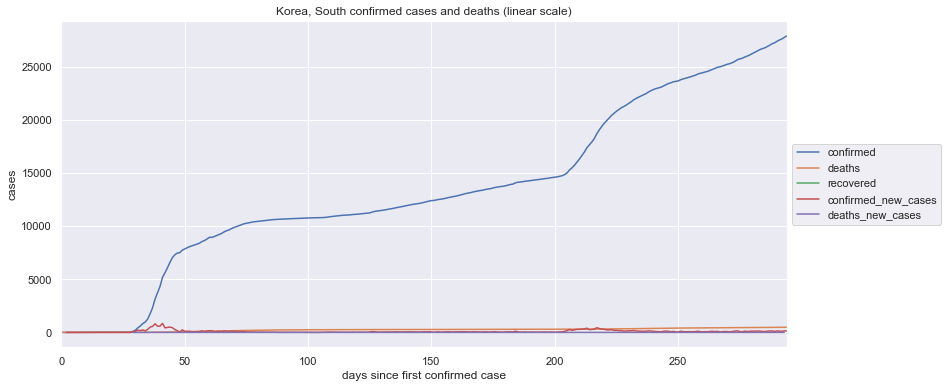

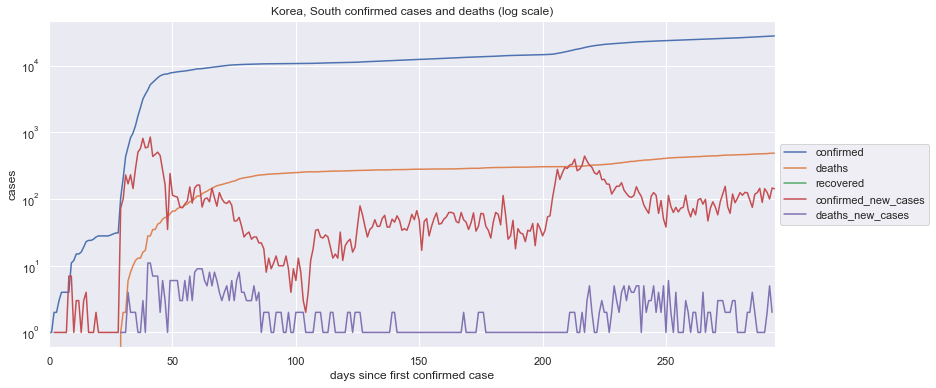

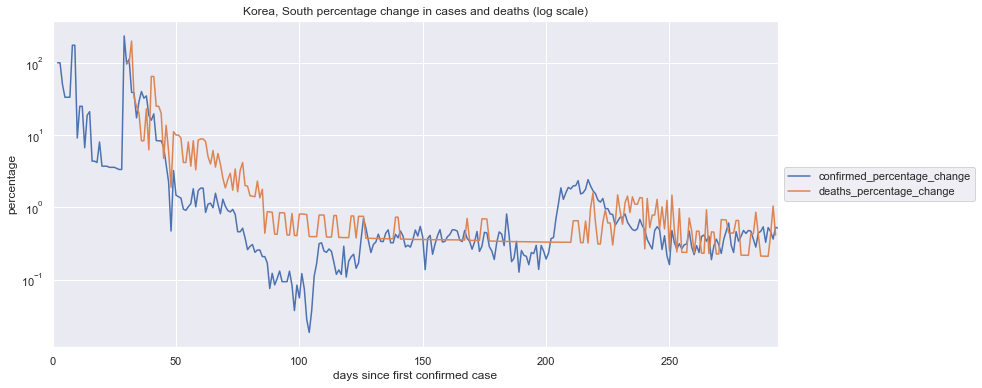

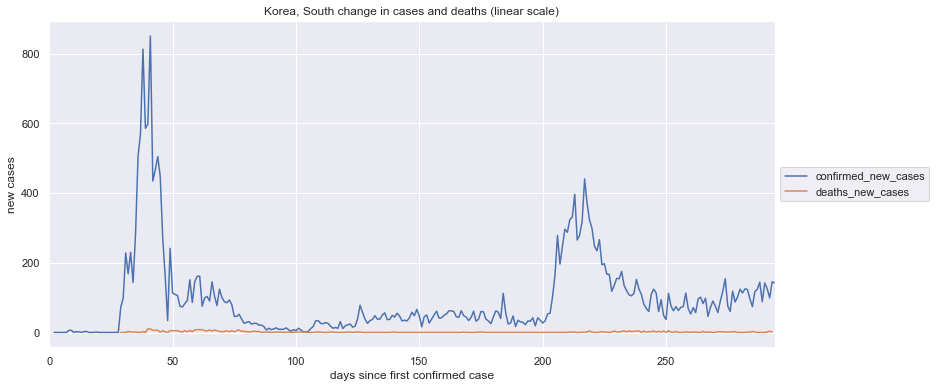

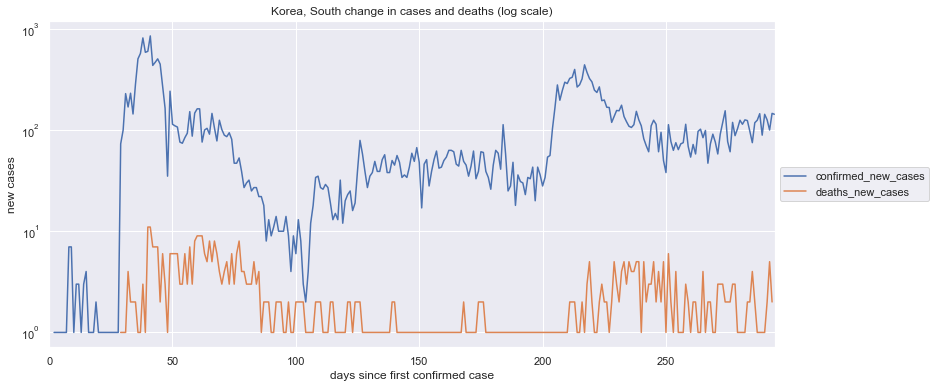

In [8]:
location_name = 'Korea, South'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Belgium

confirmed  deaths  recovered  confirmed_percentage_change  \
277     494168   12907      29357                     1.254805   
278     500789   13055      29651                     1.339828   
279     503182   13216      29796                     0.477846   
280     507475   13561      30504                     0.853170   
281     515391   13758      31130                     1.559880   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
277                                       51629.502482                 
278                                       55127.805514                 
279                                       19661.183372                 
280                                       35104.074491                 
281                                       64181.944297                 

     deaths_percentage_change  \
277                  1.565943   
278                  1.146665   
279                  1.233244   
280                  2.610472   
281                  1.452695   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
277                                       64431.405667           
278                                       47180.022245           
279                                       50742.368610           
280                                      107409.031618           
281                                       59771.787829           

     confirmed_new_cases  deaths_new_cases  
277               6124.0             199.0  
278               6621.0             148.0  
279               2393.0             161.0  
280               4293.0             345.0  
281               7916.0             197.0

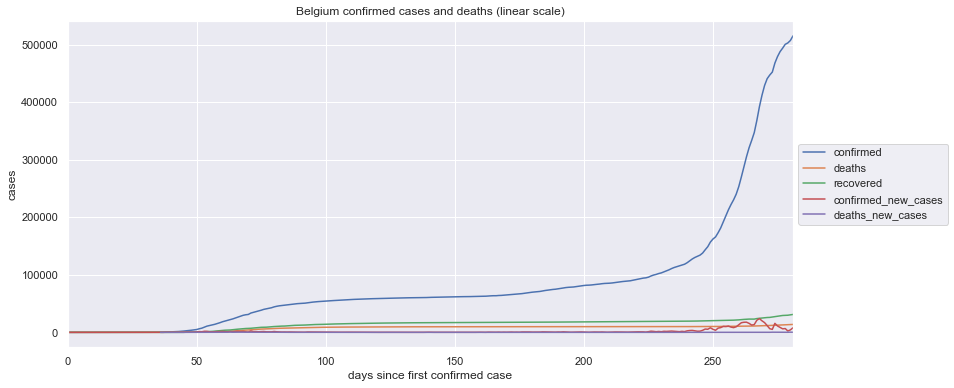

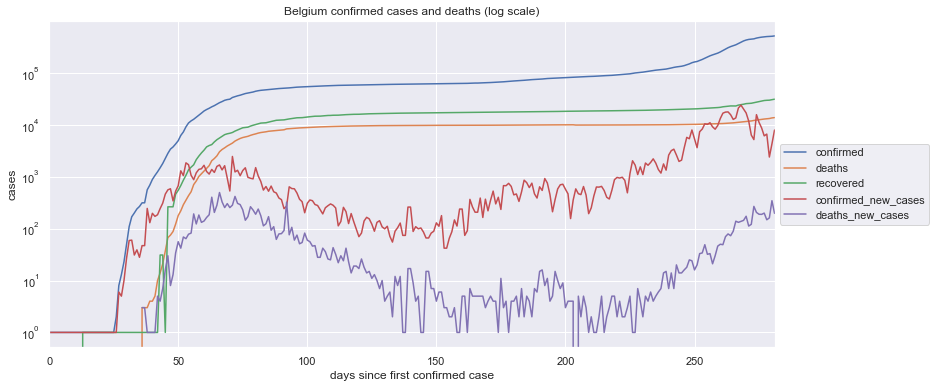

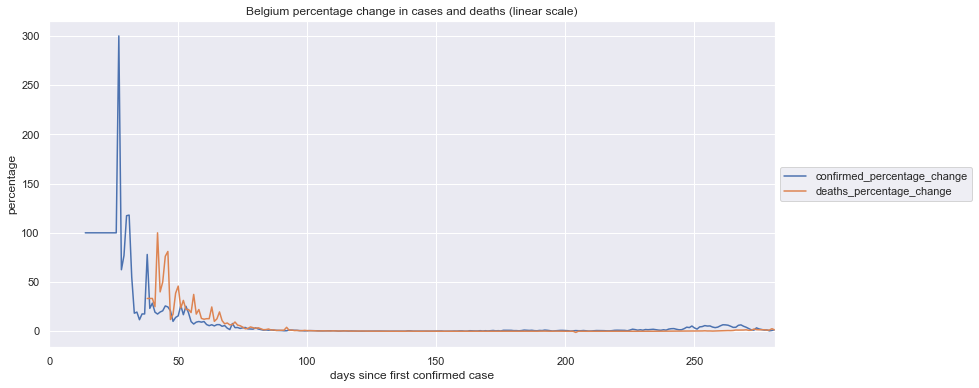

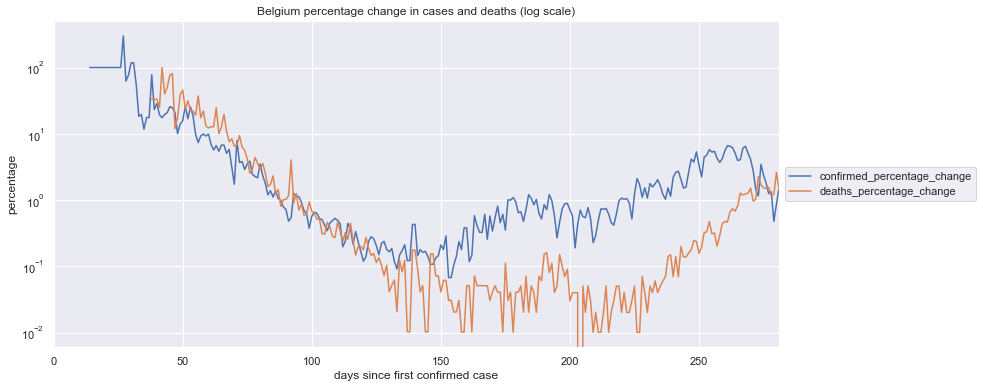

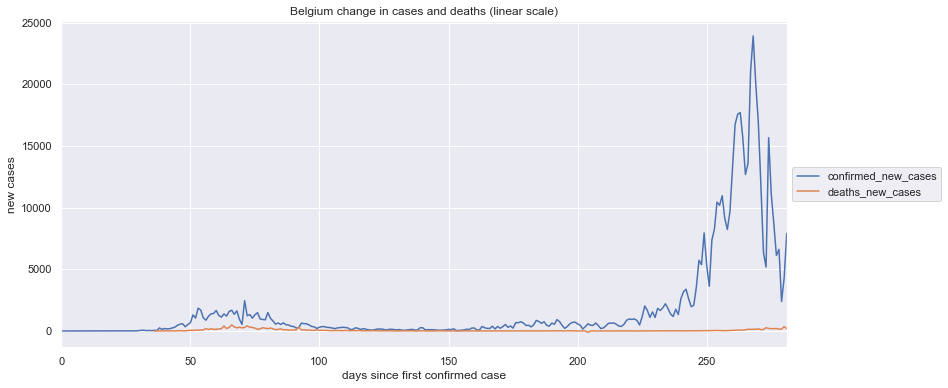

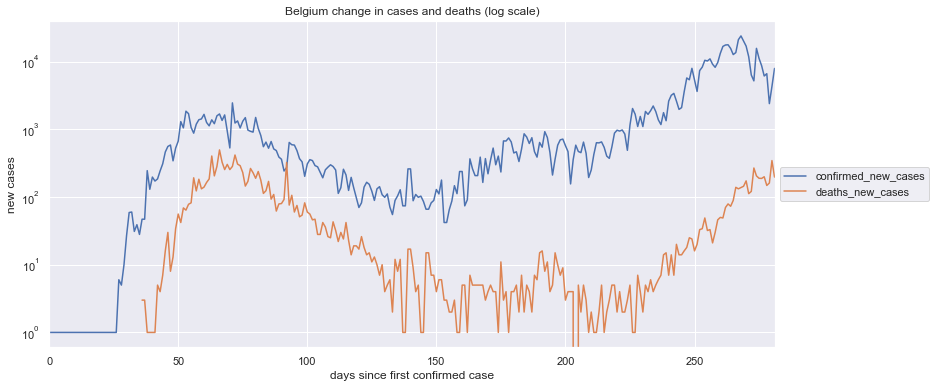

In [9]:
location_name = 'Belgium'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Switzerland

confirmed  deaths recovered  confirmed_percentage_change  \
256     211913    2749       NaN                     4.646328   
257     211913    2772       NaN                     8.167975   
258     229222    2902       NaN                     8.167975   
259     235202    3013       NaN                     2.608825   
260     243472    3113       NaN                     3.516127   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
256                                       89318.071543                 
257                                      157015.979761                 
258                                      157015.979761                 
259                                       50150.395435                 
260                                       67591.794151                 

     deaths_percentage_change  \
256                  1.439114   
257                  0.836668   
258                  4.689755   
259                  3.824948   
260                  3.318951   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
256                                       27664.625242           
257                                       16083.574366           
258                                       90152.879277           
259                                       73528.388195           
260                                       63801.419836           

     confirmed_new_cases  deaths_new_cases  
256               9409.0              39.0  
257              17309.0              23.0  
258              17309.0             130.0  
259               5980.0             111.0  
260               8270.0             100.0

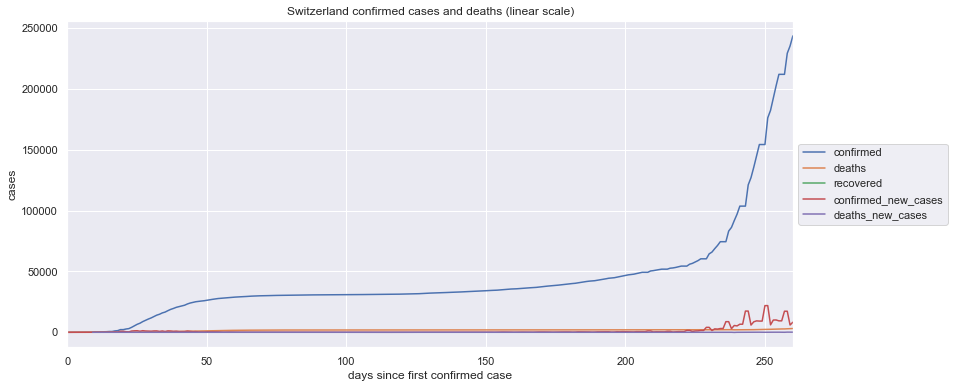

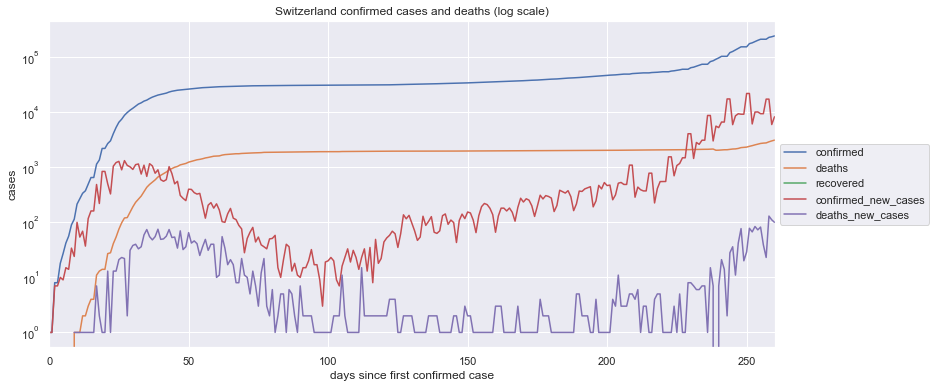

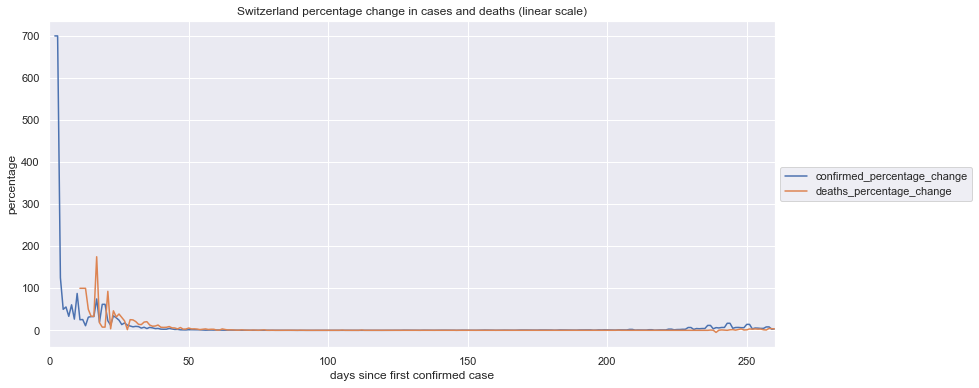

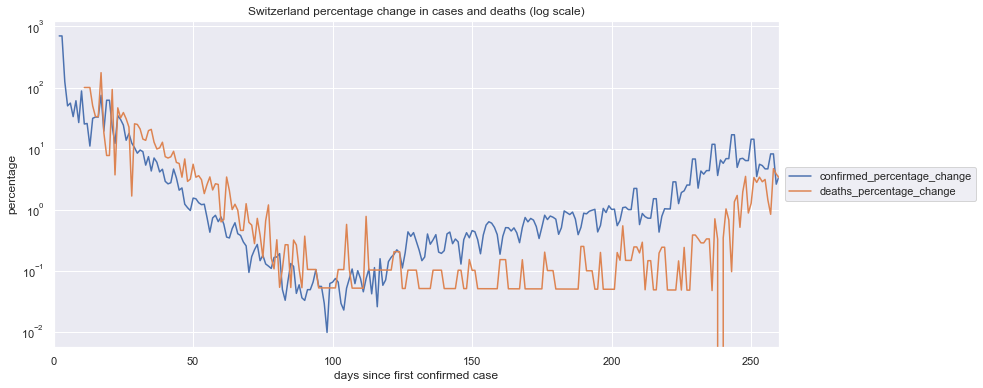

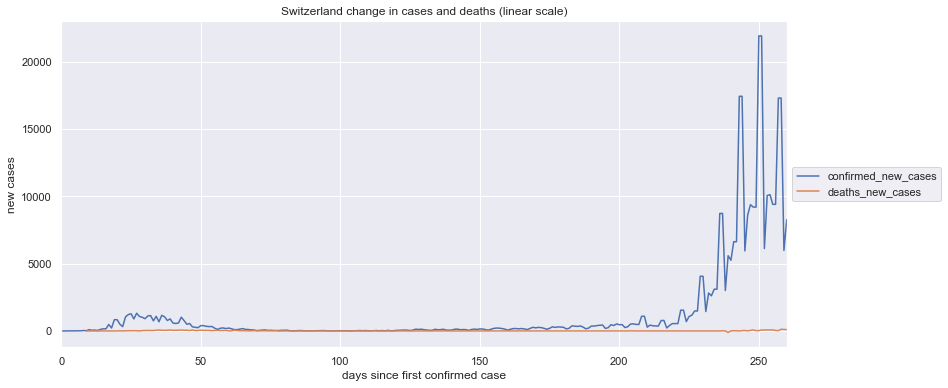

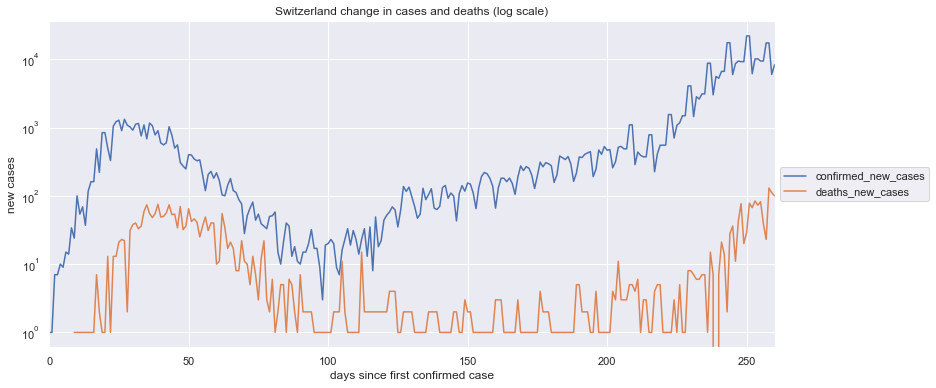

In [10]:
location_name = 'Switzerland'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Greece

confirmed  deaths recovered  confirmed_percentage_change  \
255      54809     749       NaN                     4.889578   
256      56698     784       NaN                     3.446514   
257      58187     825       NaN                     2.626195   
258      60570     866       NaN                     4.095417   
259      63321     909       NaN                     4.541852   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
255                                       19885.465519                 
256                                       14016.658046                 
257                                       10680.494407                 
258                                       16655.684079                 
259                                       18471.298025                 

     deaths_percentage_change  \
255                  4.755245   
256                  4.672897   
257                  5.229592   
258                  4.969697   
259                  4.965358   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
255                                       19339.145194           
256                                       19004.245208           
257                                       21268.271359           
258                                       20211.302722           
259                                       20193.656398           

     confirmed_new_cases  deaths_new_cases  
255               2555.0              34.0  
256               1889.0              35.0  
257               1489.0              41.0  
258               2383.0              41.0  
259               2751.0              43.0

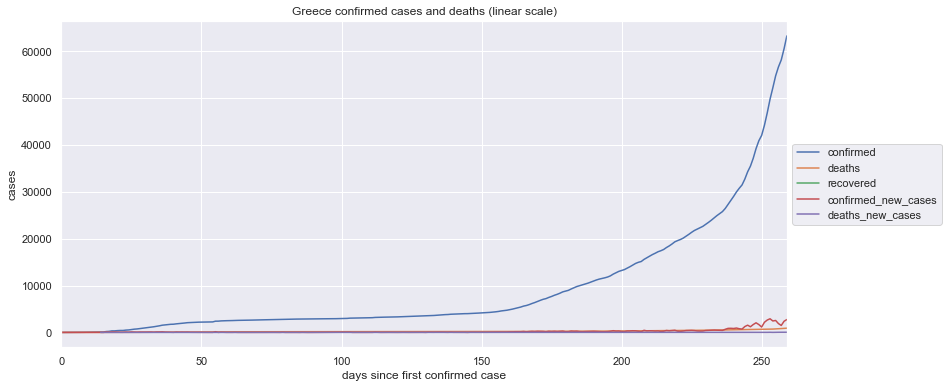

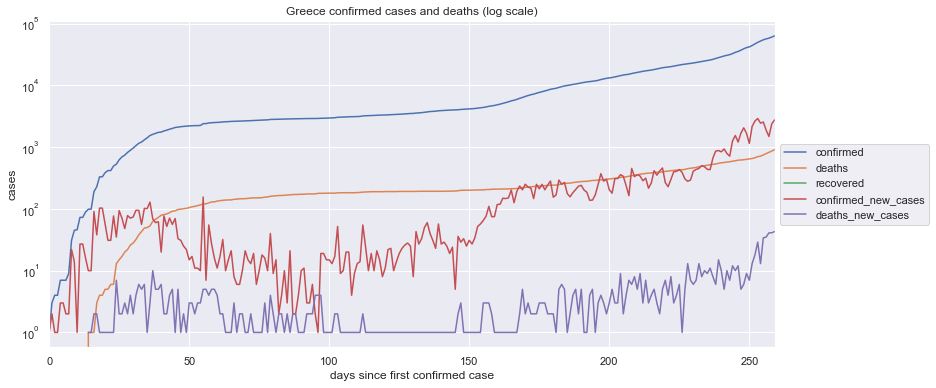

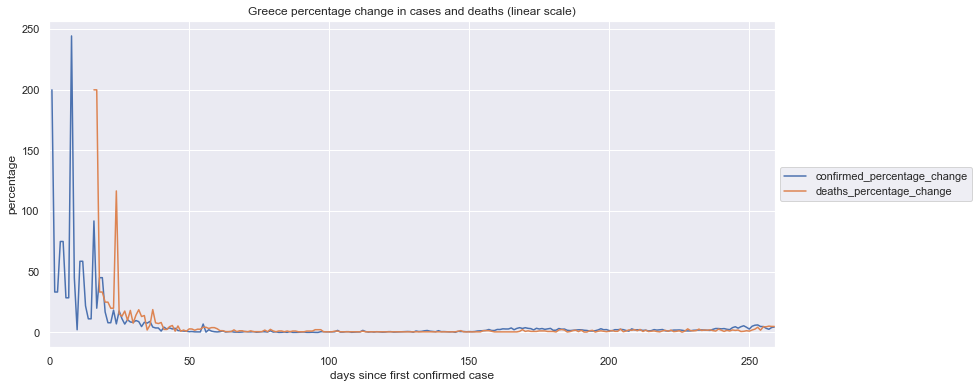

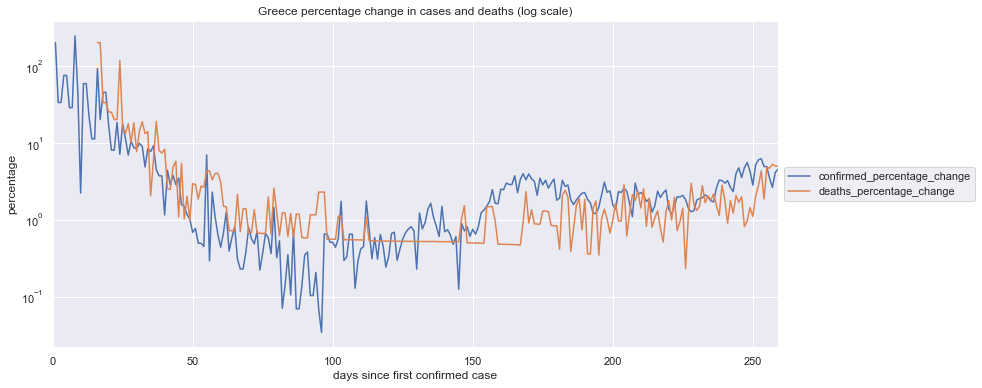

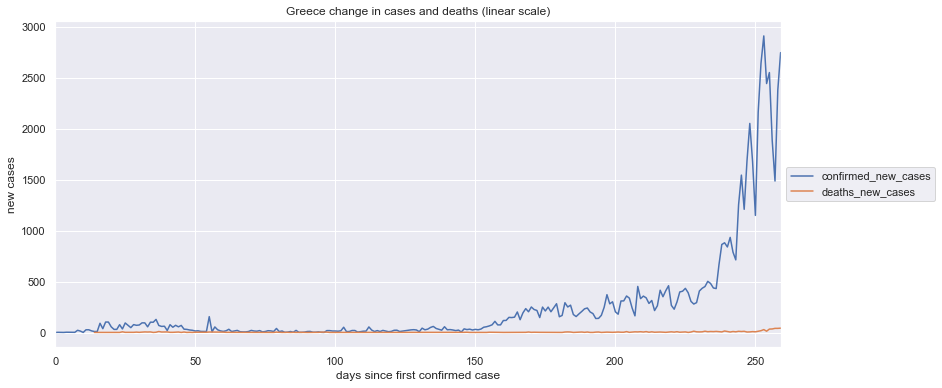

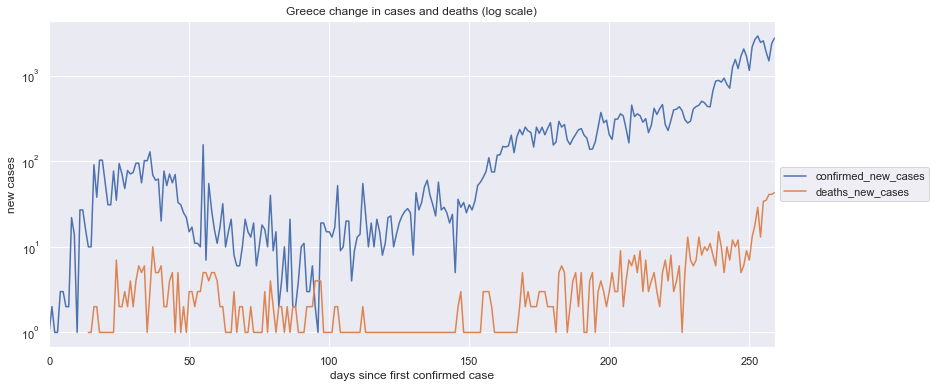

In [11]:
location_name = 'Greece'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Norway

confirmed  deaths recovered  confirmed_percentage_change  \
255      24243     285       NaN                     1.711768   
256      24732     285       NaN                     2.017077   
257      25325     285       NaN                     2.397703   
258      25887     285       NaN                     2.219151   
259      26511     285       NaN                     2.410476   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
255                                        7259.084682                 
256                                        8553.805159                 
257                                       10167.924469                 
258                                        9410.738756                 
259                                       10222.090507                 

     deaths_percentage_change  \
255                       NaN   
256                       NaN   
257                       NaN   
258                       NaN   
259                       NaN   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
255                                                NaN           
256                                                NaN           
257                                                NaN           
258                                                NaN           
259                                                NaN           

     confirmed_new_cases  deaths_new_cases  
255                408.0               NaN  
256                489.0               NaN  
257                593.0               NaN  
258                562.0               NaN  
259                624.0               NaN

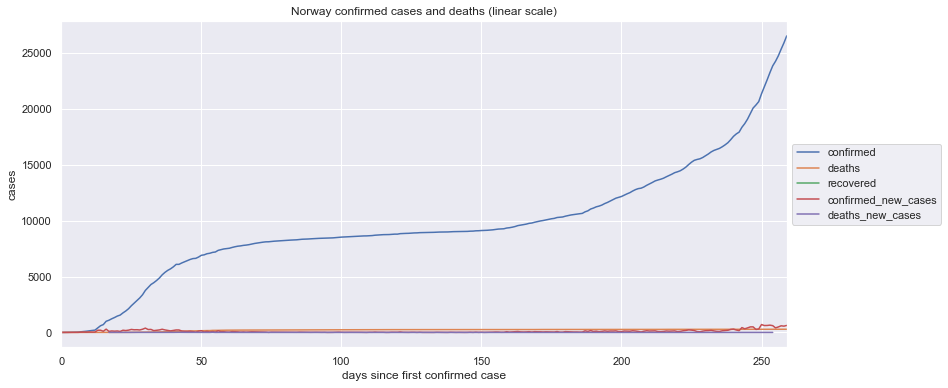

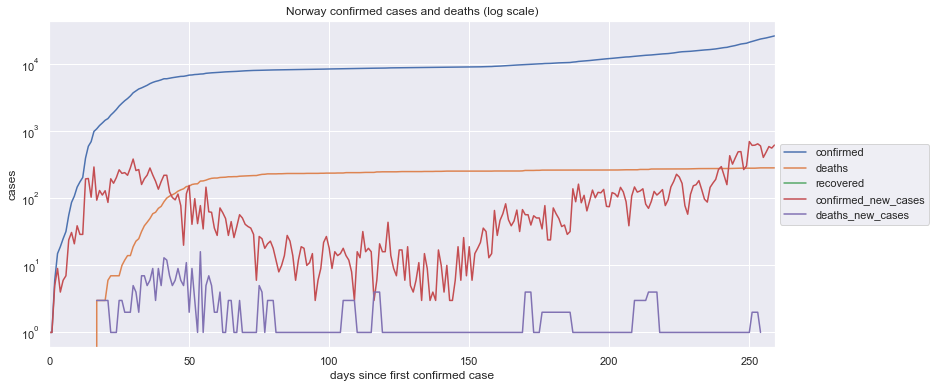

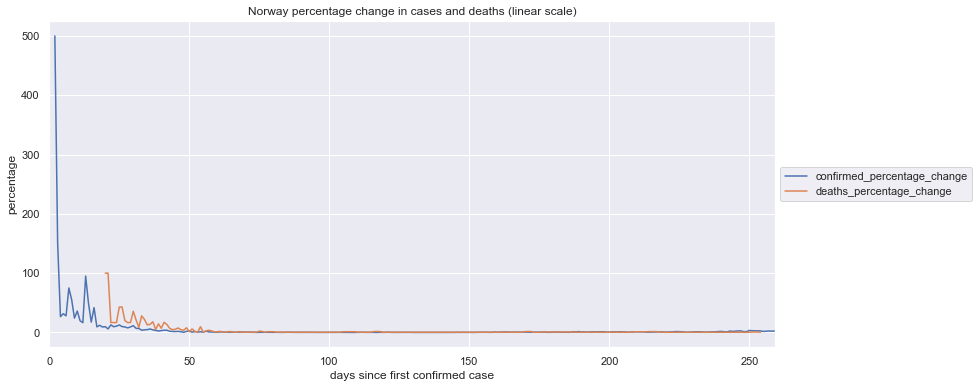

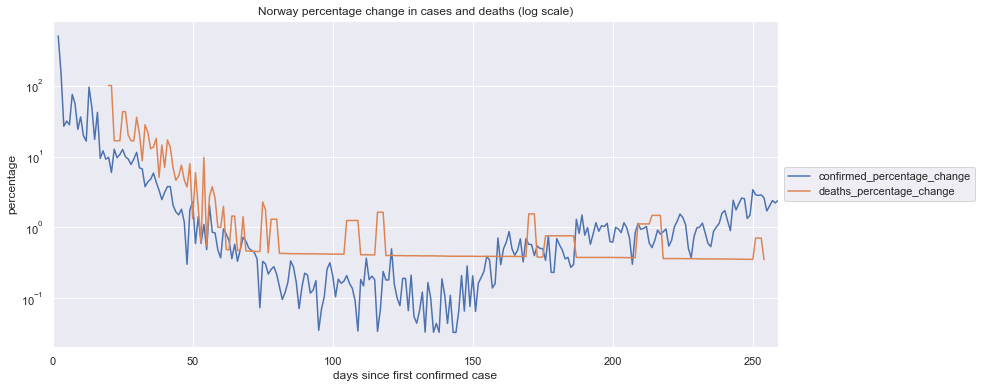

In [12]:
location_name = 'Norway'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Austria

In [13]:
location_name = 'Austria'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

confirmed  deaths  recovered  confirmed_percentage_change  \
256     147220    1377      88273                     5.929673   
257     153153    1411      91719                     4.030023   
258     158746    1454      94627                     3.651904   
259     164866    1499      98663                     3.855215   
260     172380    1564     103759                     4.557641   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
256                                       75253.789423                 
257                                       51145.234842                 
258                                       46346.501126                 
259                                       48926.739294                 
260                                       57841.258236                 

     deaths_percentage_change  \
256                  2.761194   
257                  2.469136   
258                  3.047484   
259                  3.094911   
260                  4.336224   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
256                                       35042.458513           
257                                       31335.932203           
258                                       38675.780250           
259                                       39277.672930           
260                                       55031.248516           

     confirmed_new_cases  deaths_new_cases  
256               8241.0              37.0  
257               5933.0              34.0  
258               5593.0              43.0  
259               6120.0              45.0  
260               7514.0              65.0

# Sweden

confirmed  deaths recovered  confirmed_percentage_change  \
280     146461    6022       NaN                     3.313253   
281     146461    6022       NaN                     3.313253   
282     146461    6022       NaN                    10.773516   
283     162240    6057       NaN                    10.773516   
284     166707    6082       NaN                     2.753328   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
280                                       85575.490606                 
281                                       85575.490606                 
282                                      278260.958831                 
283                                      278260.958831                 
284                                       71113.623975                 

     deaths_percentage_change  \
280                  0.333222   
281                  0.333222   
282                  0.581202   
283                  0.581202   
284                  0.412746   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
280                                        8606.544146           
281                                        8606.544146           
282                                       15011.430827           
283                                       15011.430827           
284                                       10660.491573           

     confirmed_new_cases  deaths_new_cases  
280               4697.0              20.0  
281               4697.0              20.0  
282              15779.0              35.0  
283              15779.0              35.0  
284               4467.0              25.0

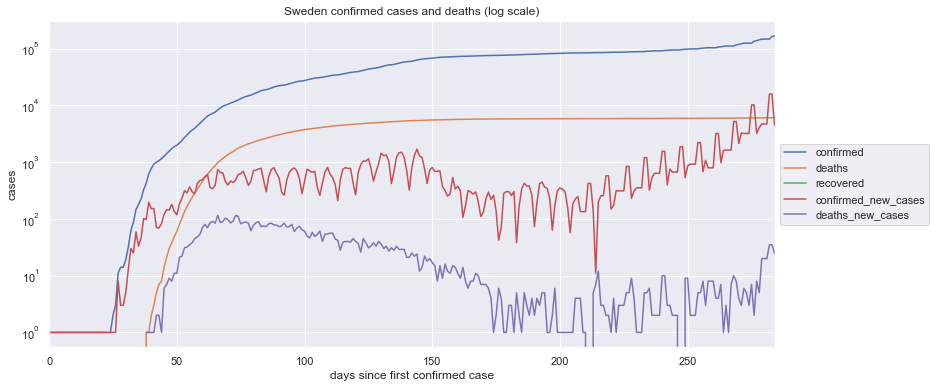

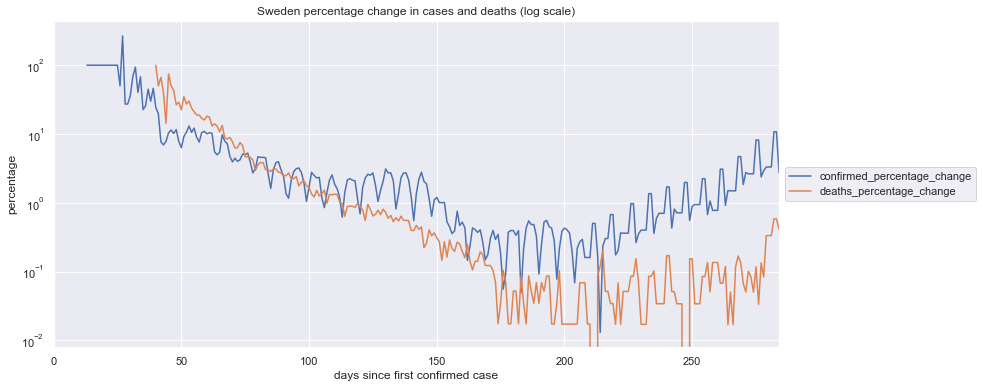

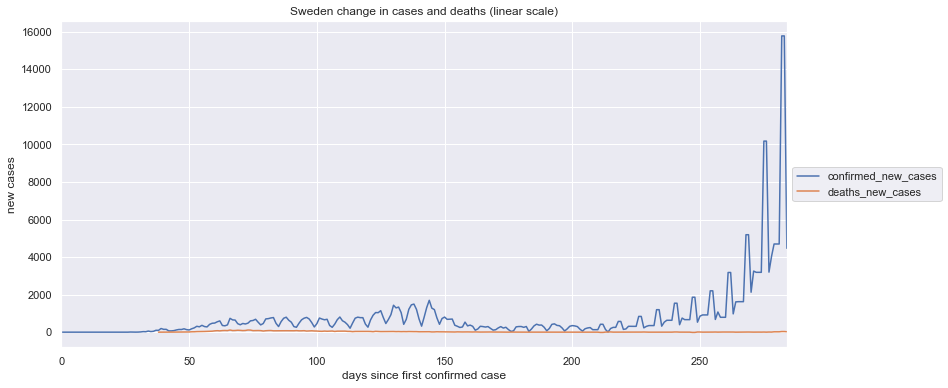

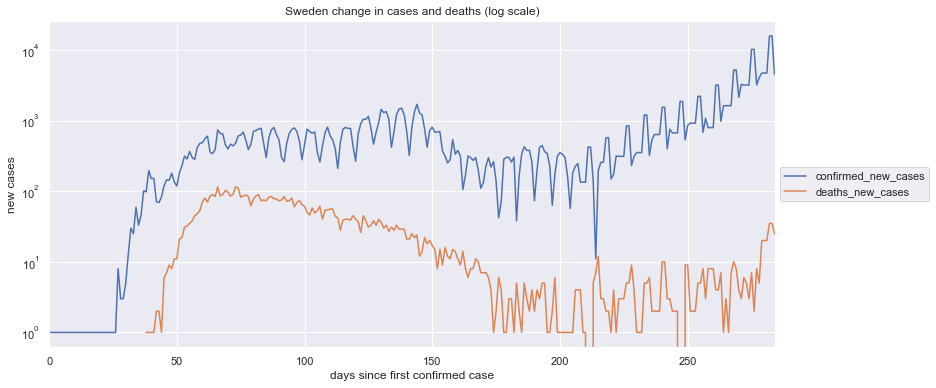

In [14]:
location_name = 'Sweden'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Ireland

confirmed  deaths recovered  confirmed_percentage_change  \
252      64855    1945       NaN                     0.491183   
253      65394    1947       NaN                     0.831085   
254      65659    1948       NaN                     0.405236   
255      65889    1963       NaN                     0.350295   
256      66247    1965       NaN                     0.543338   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
252                                        5565.472737                 
253                                        9416.805528                 
254                                        4591.623512                 
255                                        3969.098457                 
256                                        6156.422411                 

     deaths_percentage_change  \
252                  0.257732   
253                  0.102828   
254                  0.051361   
255                  0.770021   
256                  0.101885   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
252                                        2920.293989           
253                                        1165.114723           
254                                         581.958946           
255                                        8724.902986           
256                                        1154.431042           

     confirmed_new_cases  deaths_new_cases  
252                317.0               5.0  
253                539.0               2.0  
254                265.0               1.0  
255                230.0              15.0  
256                358.0               2.0

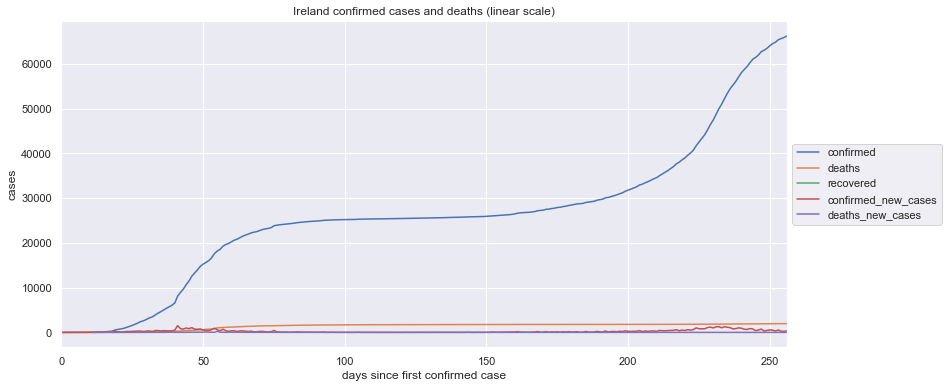

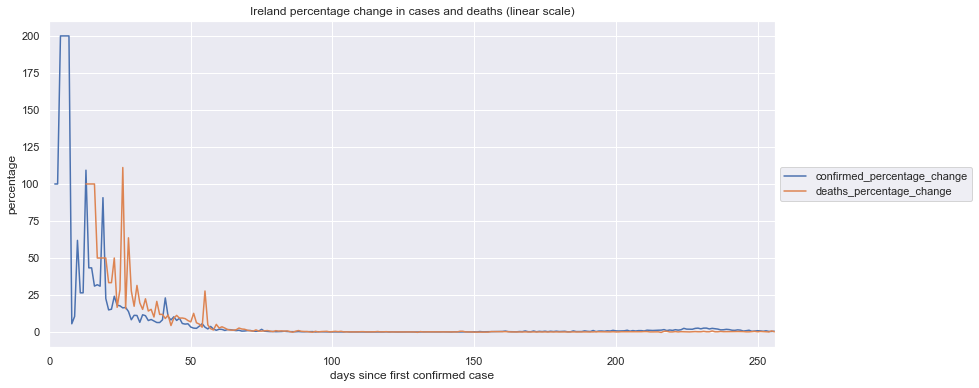

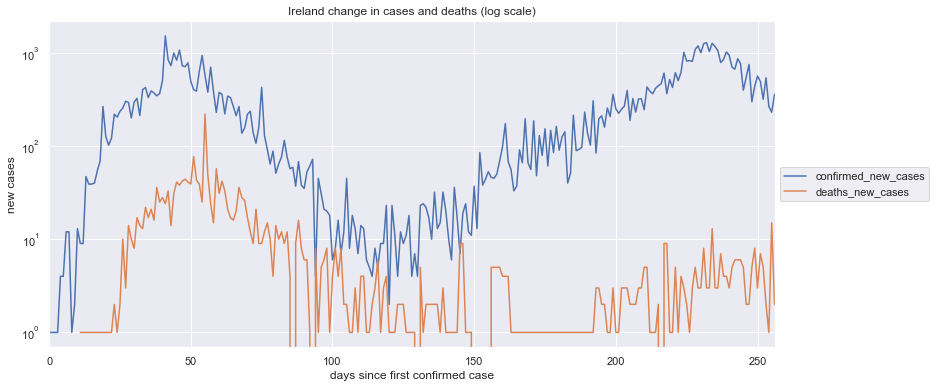

In [15]:
location_name = 'Ireland'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# United Kingdom (approximate)

confirmed  deaths recovered  confirmed_percentage_change  \
281    1171441   48888       NaN                     2.176829   
282    1192013   49044       NaN                     1.756128   
283    1213363   49238       NaN                     1.791088   
284    1233775   49770       NaN                     1.682267   
285    1256725   50365       NaN                     1.860145   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
281                                      308737.431416                 
282                                      249069.759505                 
283                                      254028.119589                 
284                                      238594.109800                 
285                                      263822.377552                 

     deaths_percentage_change  \
281                  0.851986   
282                  0.319097   
283                  0.395563   
284                  1.080466   
285                  1.195499   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
281                                      120836.222383           
282                                       45257.153341           
283                                       56102.311090           
284                                      153241.408172           
285                                      169556.417078           

     confirmed_new_cases  deaths_new_cases  
281              24957.0             413.0  
282              20572.0             156.0  
283              21350.0             194.0  
284              20412.0             532.0  
285              22950.0             595.0

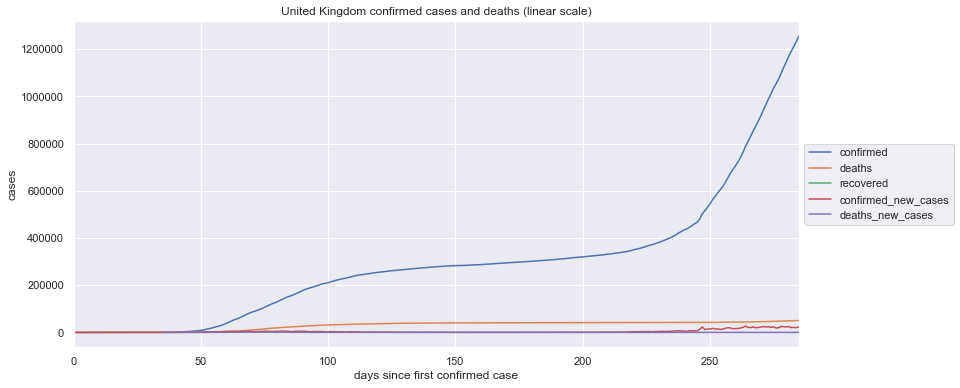

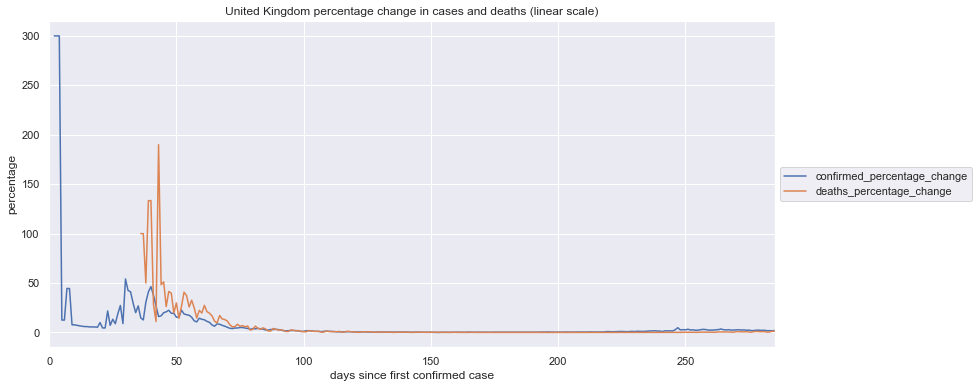

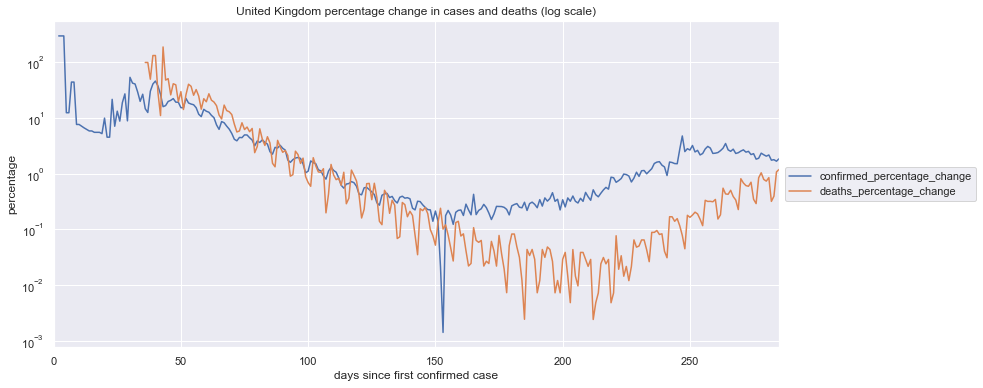

In [16]:
location_name = 'United Kingdom'
#location = df.query('country == @location_name')
location = df.query('country in ["United Kingdom"] and province == ""')
location = process(location)
locations[location_name] = location

# Germany

confirmed  deaths recovered  confirmed_percentage_change  \
285     668114   11306       NaN                     2.159354   
286     682624   11372       NaN                     2.171785   
287     689146   11408       NaN                     0.955431   
288     715693   11781       NaN                     3.852159   
289     738094   11994       NaN                     3.129973   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
285                                      203766.695387                 
286                                      204939.782569                 
287                                       90158.914055                 
288                                      363507.722019                 
289                                      295358.903782                 

     deaths_percentage_change  \
285                  0.587189   
286                  0.583761   
287                  0.316567   
288                  3.269635   
289                  1.807996   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
285                                       55409.860305           
286                                       55086.399242           
287                                       29872.741494           
288                                      308538.064100           
289                                      170610.941030           

     confirmed_new_cases  deaths_new_cases  
285              14122.0              66.0  
286              14510.0              66.0  
287               6522.0              36.0  
288              26547.0             373.0  
289              22401.0             213.0

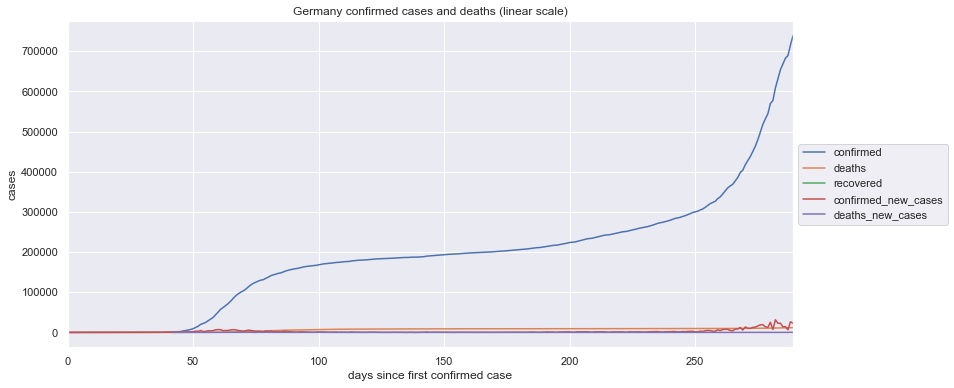

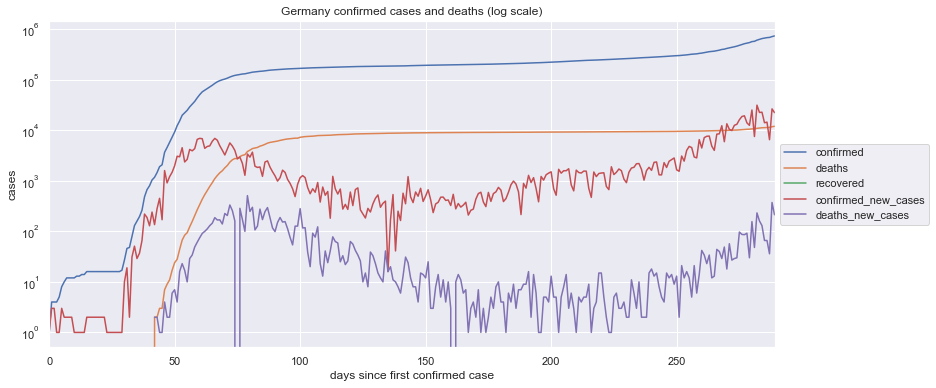

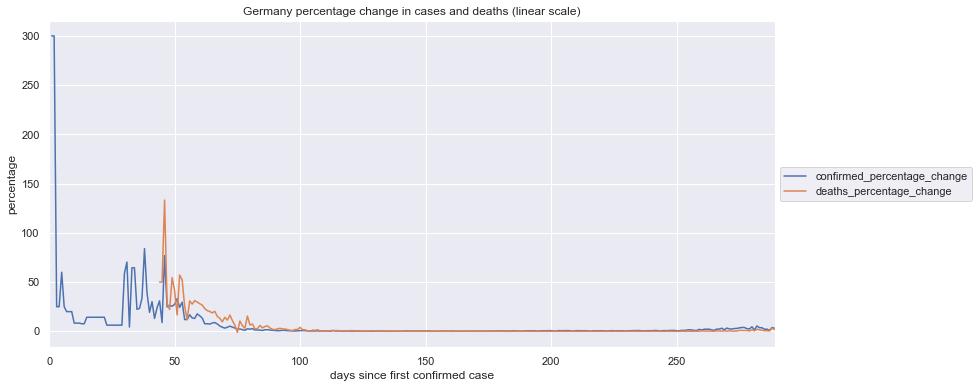

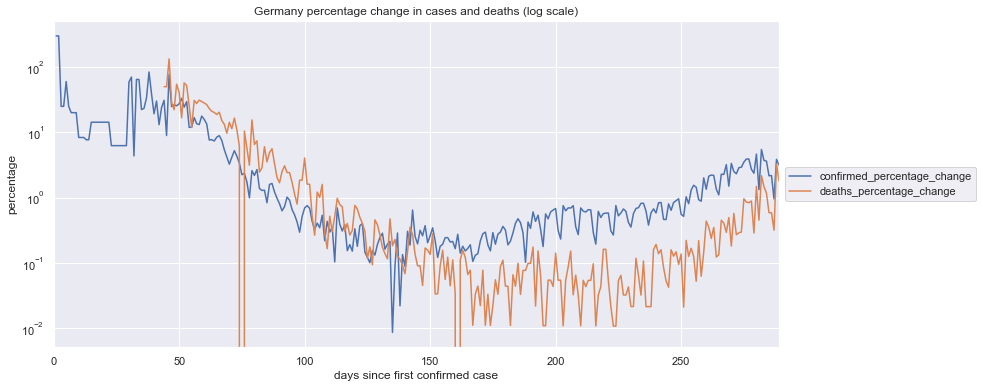

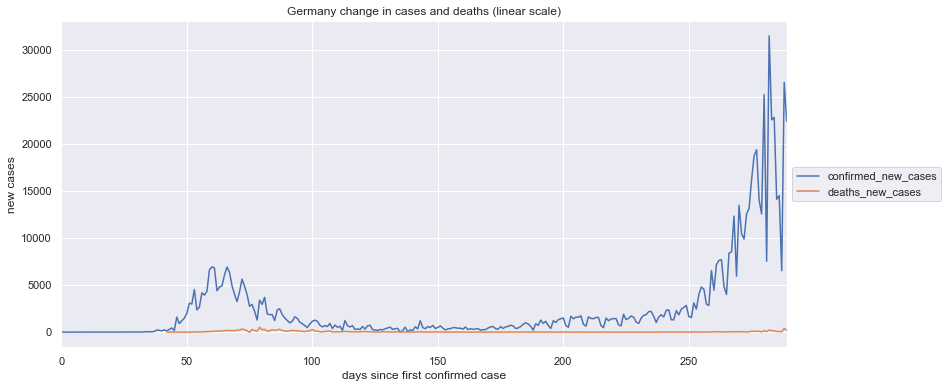

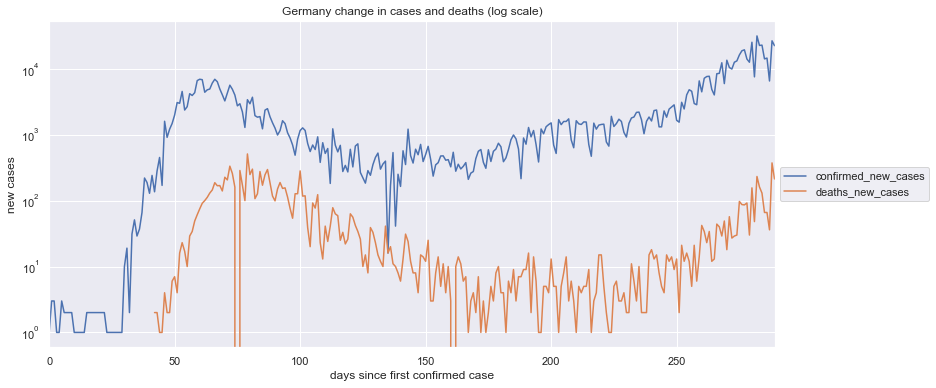

In [17]:
location_name = 'Germany'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Italy

confirmed  deaths recovered  confirmed_percentage_change  \
281     902490   41063       NaN                     4.614568   
282     935104   41394       NaN                     3.613780   
283     960373   41750       NaN                     2.702266   
284     995463   42330       NaN                     3.653789   
285    1028424   42953       NaN                     3.311123   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
281                                      525465.110533                 
282                                      411504.433486                 
283                                      307709.561132                 
284                                      416060.298771                 
285                                      377040.590448                 

     deaths_percentage_change  \
281                  1.045819   
282                  0.806078   
283                  0.860028   
284                  1.389222   
285                  1.471769   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
281                                      119088.398310           
282                                       91788.900751           
283                                       97932.186913           
284                                      158191.944301           
285                                      167591.747080           

     confirmed_new_cases  deaths_new_cases  
281              39809.0             425.0  
282              32614.0             331.0  
283              25269.0             356.0  
284              35090.0             580.0  
285              32961.0             623.0

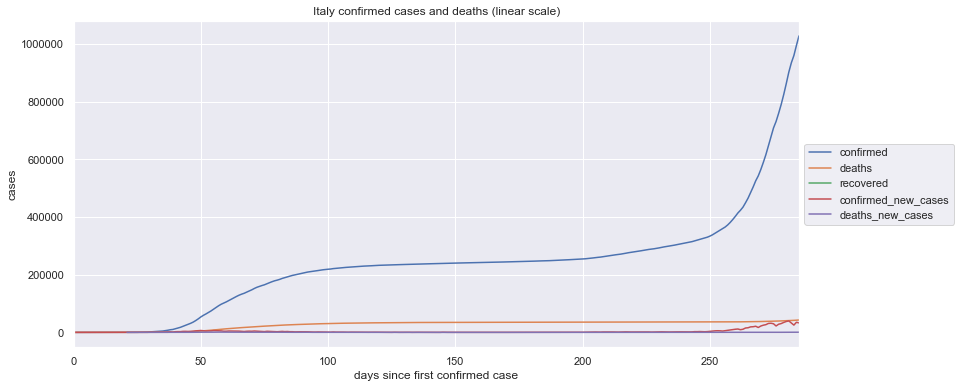

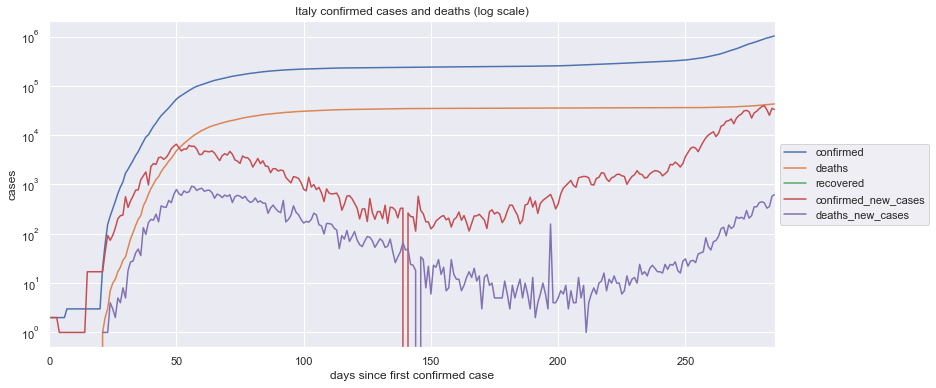

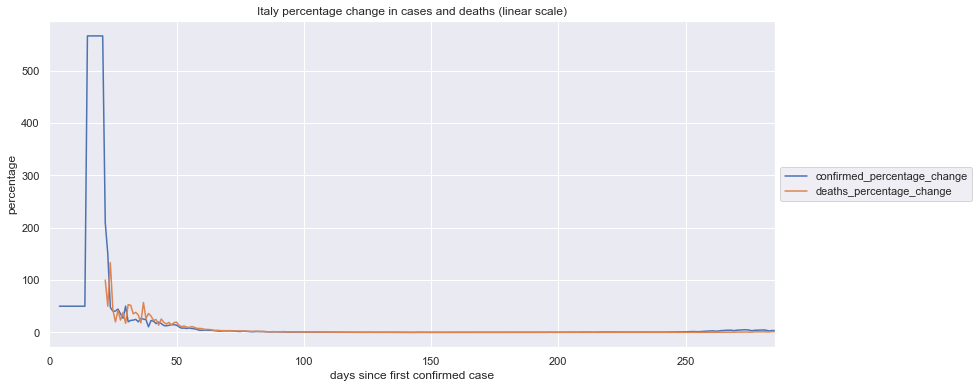

In [18]:
location_name = 'Italy'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# United States of America

confirmed  deaths recovered  confirmed_percentage_change  \
290    9886080  237317       NaN                     1.316593   
291    9995860  237779       NaN                     1.110450   
292   10115804  238469       NaN                     1.199937   
293   10256094  239905       NaN                     1.386840   
294   10399325  241910       NaN                     1.396545   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
290                                       2.151693e+06                 
291                                       1.814797e+06                 
292                                       1.961044e+06                 
293                                       2.266498e+06                 
294                                       2.282359e+06                 

     deaths_percentage_change  \
290                  0.438461   
291                  0.194676   
292                  0.290185   
293                  0.602175   
294                  0.835747   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
290                                       7.165722e+05           
291                                       3.181575e+05           
292                                       4.742470e+05           
293                                       9.841278e+05           
294                                       1.365853e+06           

     confirmed_new_cases  deaths_new_cases  
290             128468.0            1036.0  
291             109780.0             462.0  
292             119944.0             690.0  
293             140290.0            1436.0  
294             143231.0            2005.0

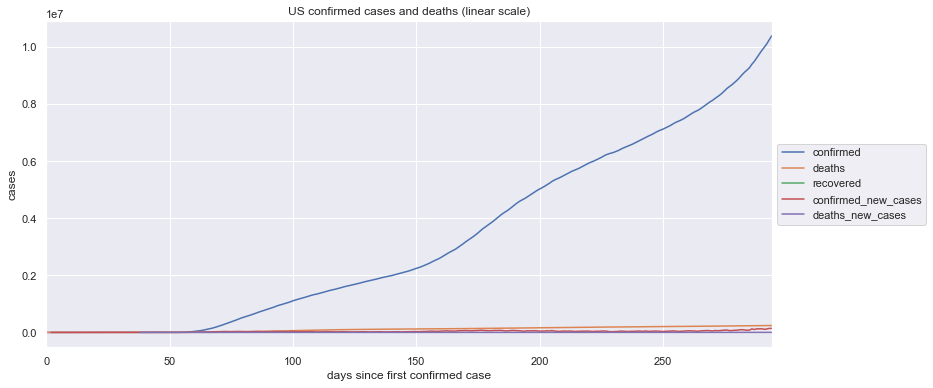

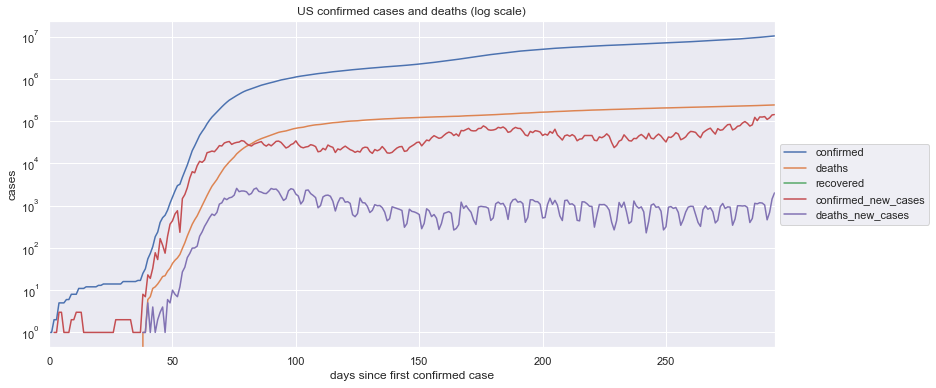

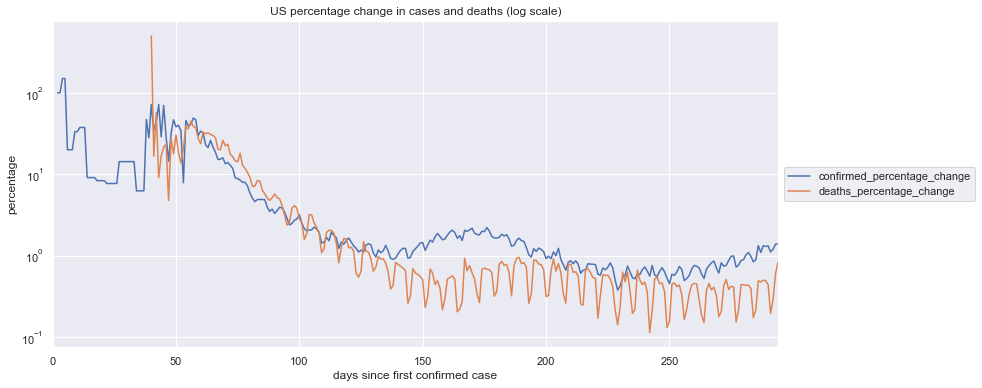

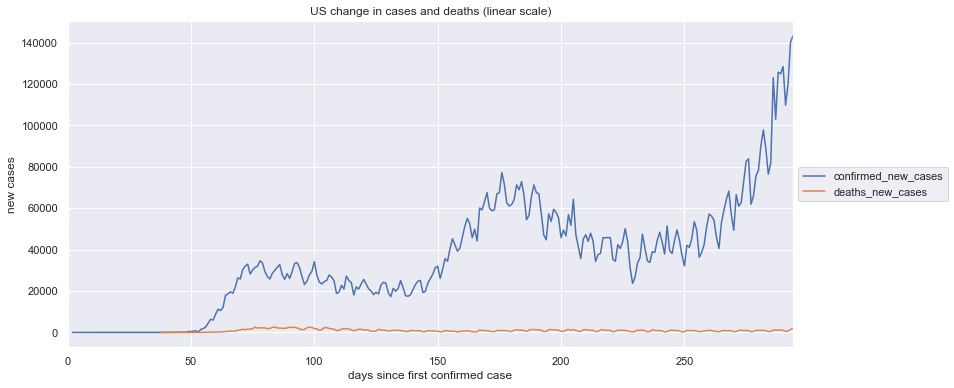

In [19]:
location_name = 'US'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Mongolia

confirmed  deaths recovered  confirmed_percentage_change  \
242        357       0       NaN                     0.280899   
243        362       0       NaN                     1.400560   
244        368       0       NaN                     1.657459   
245        382       0       NaN                     3.804348   
246        406       0       NaN                     6.282723   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
242                                          24.169206                 
243                                         120.507525                 
244                                         142.611668                 
245                                         327.335114                 
246                                         540.580353                 

     deaths_percentage_change  \
242                       NaN   
243                       NaN   
244                       NaN   
245                       NaN   
246                       NaN   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
242                                                NaN           
243                                                NaN           
244                                                NaN           
245                                                NaN           
246                                                NaN           

     confirmed_new_cases  deaths_new_cases  
242                  1.0               NaN  
243                  5.0               NaN  
244                  6.0               NaN  
245                 14.0               NaN  
246                 24.0               NaN

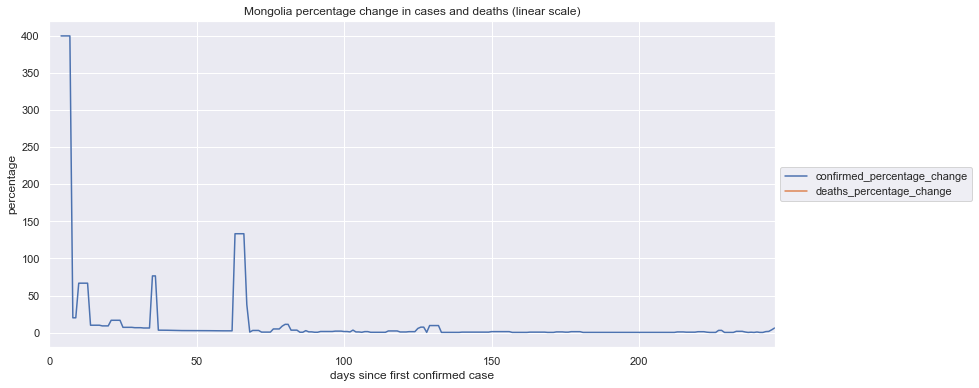

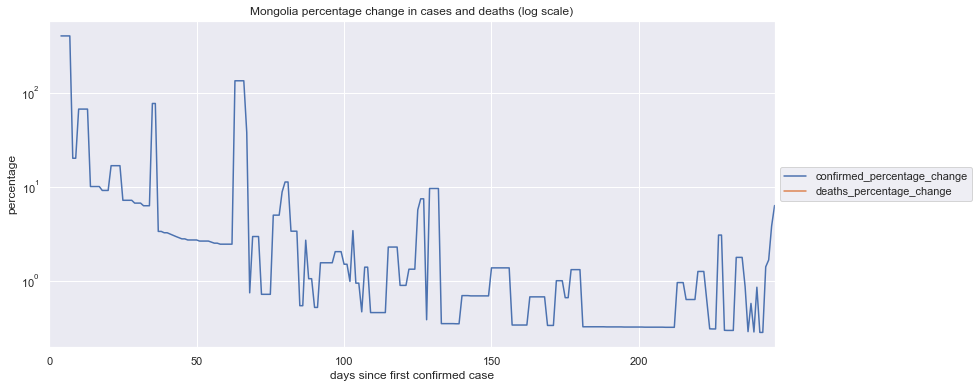

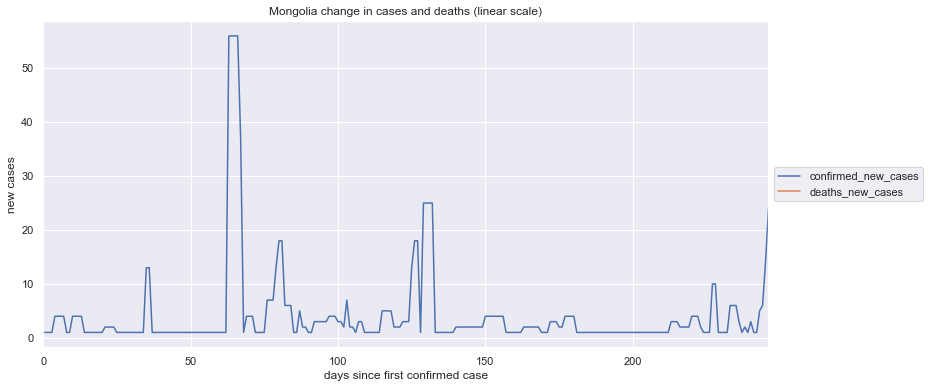

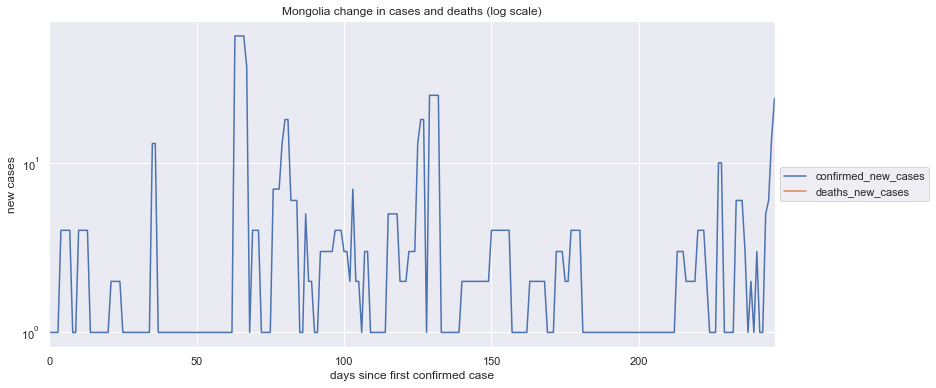

In [20]:
location_name = 'Mongolia'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# South Africa

confirmed  deaths recovered  confirmed_percentage_change  \
247     735906   19789       NaN                     0.235775   
248     737278   19809       NaN                     0.186437   
249     738525   19845       NaN                     0.169136   
250     740254   19951       NaN                     0.234115   
251     742394   20011       NaN                     0.289090   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
247                                       32129.837554                 
248                                       25406.381864                 
249                                       23048.689233                 
250                                       31903.684789                 
251                                       39395.268463                 

     deaths_percentage_change  \
247                  0.202542   
248                  0.101066   
249                  0.181736   
250                  0.534140   
251                  0.300737   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
247                                       27601.071069           
248                                       13772.640167           
249                                       24765.722514           
250                                       72789.010544           
251                                       40982.423378           

     confirmed_new_cases  deaths_new_cases  
247               1731.0              40.0  
248               1372.0              20.0  
249               1247.0              36.0  
250               1729.0             106.0  
251               2140.0              60.0

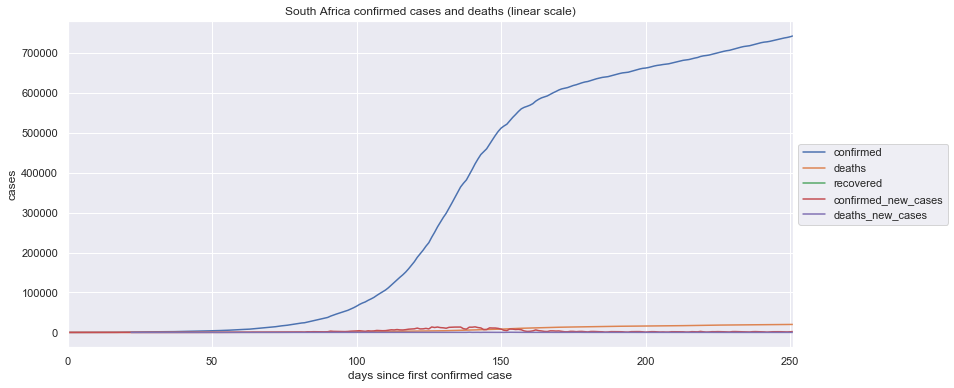

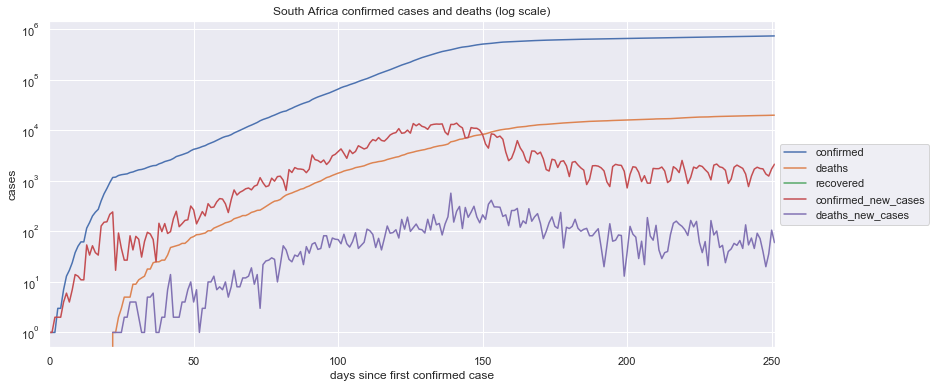

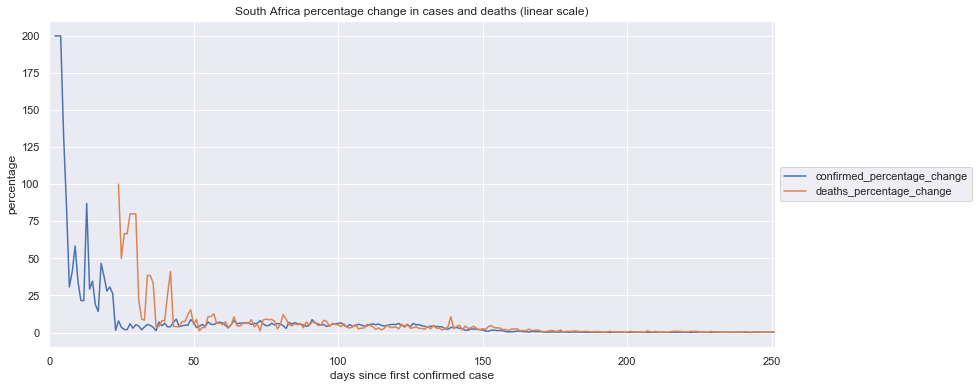

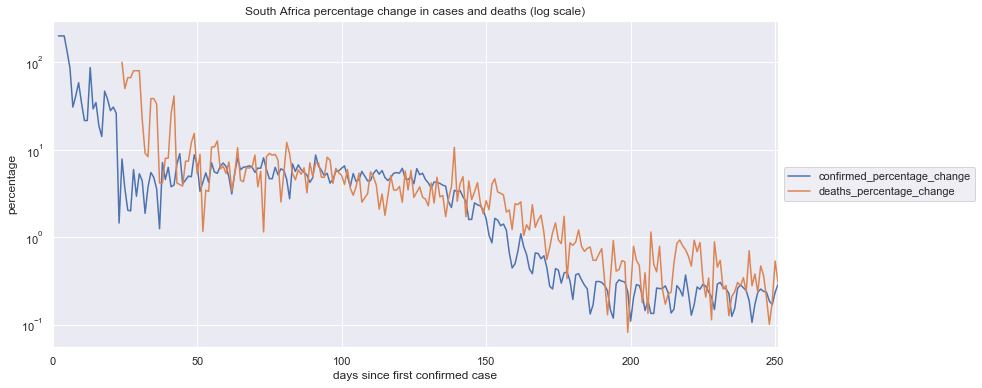

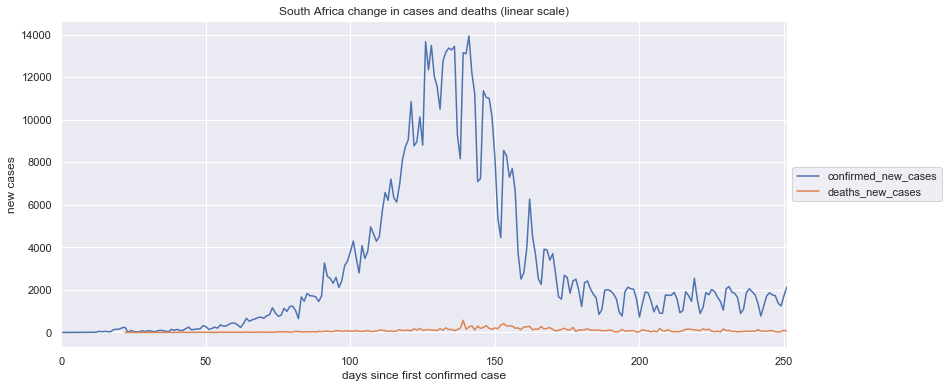

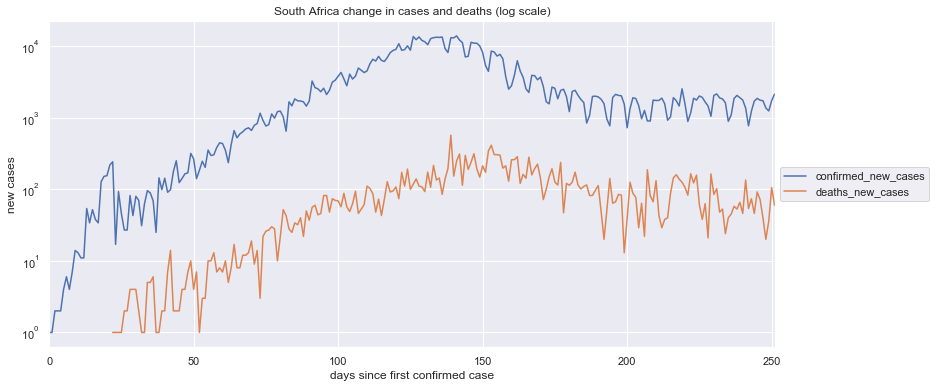

In [21]:
location_name = 'South Africa'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

---

In [22]:
South_Korea              = locations['Korea, South']
Greece                   = locations['Greece']
Belgium                  = locations['Belgium']
Norway                   = locations['Norway']
Austria                  = locations['Austria']
Sweden                   = locations['Sweden']
Ireland                  = locations['Ireland']
United_Kingdom           = locations['United Kingdom']
Germany                  = locations['Germany']
Italy                    = locations['Italy']
United_States_of_America = locations['US']
Switzerland              = locations['Switzerland']
Mongolia                 = locations['Mongolia']
South_Africa             = locations['South Africa']

locations_list           = [South_Korea,
                            Belgium,
                            Greece,
                            Norway,
                            Austria,
                            Sweden,
                            Ireland,
                            United_Kingdom,
                            Germany,
                            Italy,
                            United_States_of_America,
                            Switzerland,
                            Mongolia,
                            South_Africa]

In [23]:
#South_Korea

In [24]:
_df = pd.merge( South_Korea.add_suffix('_South_Korea'), Sweden.add_suffix('_Sweden'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                   Ireland.add_suffix('_Ireland'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                     United_Kingdom.add_suffix('_United_Kingdom'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                   Germany.add_suffix('_Germany'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                       Italy.add_suffix('_Italy'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df, United_States_of_America.add_suffix('_United_States_of_America'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                     Greece.add_suffix('_Greece'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                     Norway.add_suffix('_Norway'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                   Austria.add_suffix('_Austria'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                   Belgium.add_suffix('_Belgium'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                           Switzerland.add_suffix('_Switzerland'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                 Mongolia.add_suffix('_Mongolia'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                         South_Africa.add_suffix('_South_Africa'), how='outer', left_index=True, right_index=True)
_df.tail()

confirmed_South_Korea  deaths_South_Korea recovered_South_Korea  \
290                  27427                 478                   NaN   
291                  27553                 480                   NaN   
292                  27653                 485                   NaN   
293                  27799                 487                   NaN   
294                  27942                 487                   NaN   

     confirmed_percentage_change_South_Korea  \
290                                 0.524117   
291                                 0.459401   
292                                 0.362937   
293                                 0.527972   
294                                 0.514407   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor_South_Korea  \
290                                        3521.459258                             
291                                        3086.646611                             
292                                        2438.516954                             
293                                        3547.360074                             
294                                        3456.221246                             

     deaths_percentage_change_South_Korea  \
290                              0.209644   
291                              0.418410   
292                              1.041667   
293                              0.412371   
294                                   NaN   

     deaths_percentage_change_by_half_mean_deaths_cases_factor_South_Korea  \
290                                        1408.563053                       
291                                        2811.232537                       
292                                        6998.797669                       
293                                        2770.658046                       
294                                                NaN                       

     confirmed_new_cases_South_Korea  deaths_new_cases_South_Korea  \
290                            143.0                           1.0   
291                            126.0                           2.0   
292                            100.0                           5.0   
293                            146.0                           2.0   
294                            143.0                           NaN   

     confirmed_Sweden  deaths_Sweden recovered_Sweden  \
290               NaN            NaN              NaN   
291               NaN            NaN              NaN   
292               NaN            NaN              NaN   
293               NaN            NaN              NaN   
294               NaN            NaN              NaN   

     confirmed_percentage_change_Sweden  \
290                                 NaN   
291                                 NaN   
292                                 NaN   
293                                 NaN   
294                                 NaN   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor_Sweden  \
290                                                NaN                        
291                                                NaN                        
292                                                NaN                        
293                                                NaN                        
294                                                NaN                        

     deaths_percentage_change_Sweden  \
290                              NaN   
291                              NaN   
292                              NaN   
293                              NaN   
294                              NaN   

     deaths_percentage_change_by_half_mean_deaths_cases_factor_Sweden  \
290                                                NaN                  
291                                                NaN                  
292                                                NaN                  
293    

# comparisons: confirmed cases

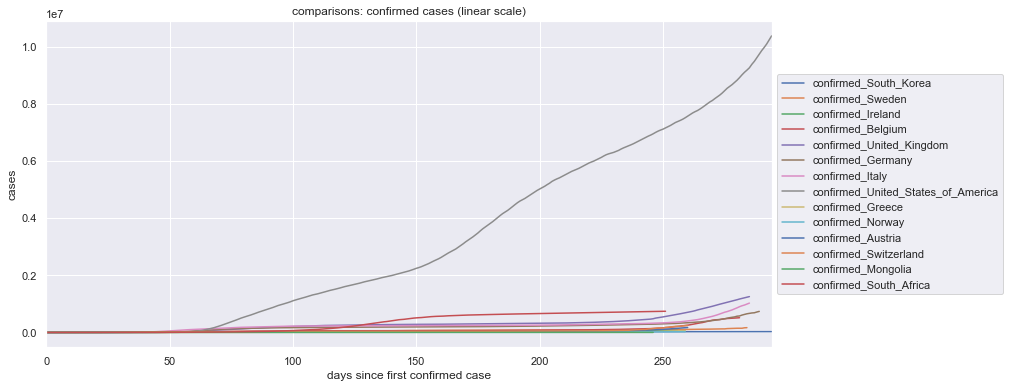

In [25]:
__df = _df[[
    'confirmed_South_Korea',
    'confirmed_Sweden',
    'confirmed_Ireland',
    'confirmed_Belgium',
    'confirmed_United_Kingdom',
    'confirmed_Germany',
    'confirmed_Italy',
    'confirmed_United_States_of_America',
    'confirmed_Greece',
    'confirmed_Norway',
    'confirmed_Austria',
    'confirmed_Switzerland',
    'confirmed_Mongolia',
    'confirmed_South_Africa']]

title = 'comparisons: confirmed cases'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

# comparisons: confirmed new cases

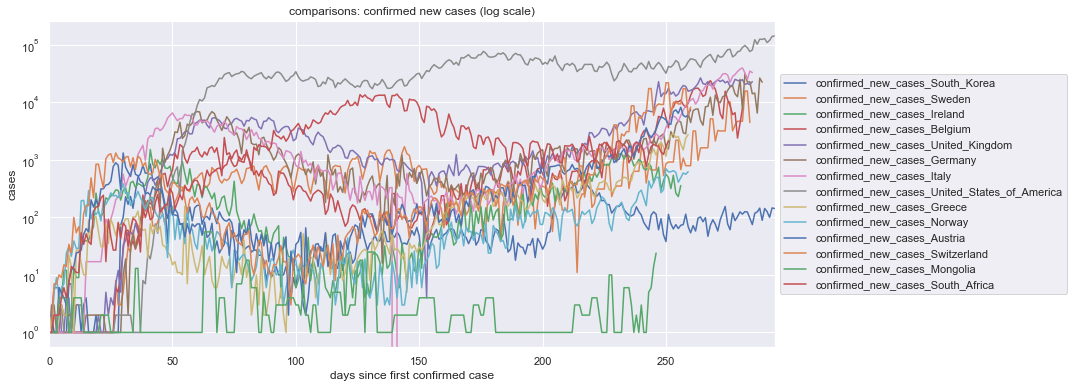

In [26]:
__df = _df[[
    'confirmed_new_cases_South_Korea',
    'confirmed_new_cases_Sweden',
    'confirmed_new_cases_Ireland',
    'confirmed_new_cases_Belgium',
    'confirmed_new_cases_United_Kingdom',
    'confirmed_new_cases_Germany',
    'confirmed_new_cases_Italy',
    'confirmed_new_cases_United_States_of_America',
    'confirmed_new_cases_Greece',
    'confirmed_new_cases_Norway',
    'confirmed_new_cases_Austria',
    'confirmed_new_cases_Switzerland',
    'confirmed_new_cases_Mongolia',
    'confirmed_new_cases_South_Africa']]

title = 'comparisons: confirmed new cases'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

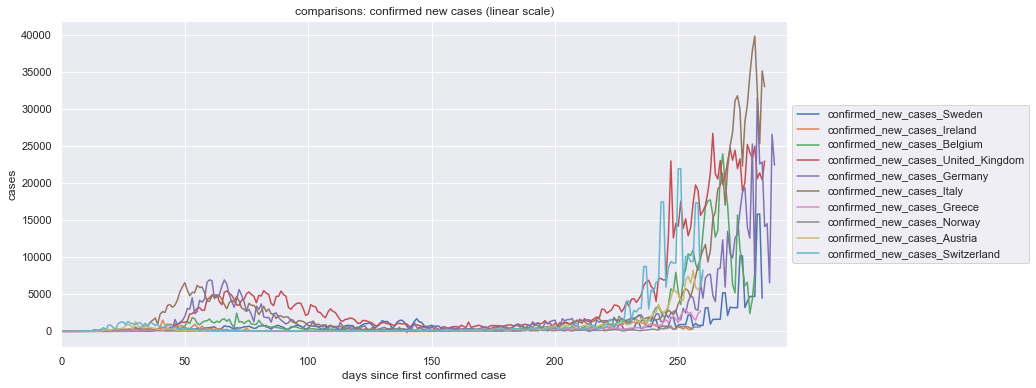

In [27]:
# European
__df = _df[[
    'confirmed_new_cases_Sweden',
    'confirmed_new_cases_Ireland',
    'confirmed_new_cases_Belgium',
    'confirmed_new_cases_United_Kingdom',
    'confirmed_new_cases_Germany',
    'confirmed_new_cases_Italy',
    'confirmed_new_cases_Greece',
    'confirmed_new_cases_Norway',
    'confirmed_new_cases_Austria',
    'confirmed_new_cases_Switzerland']]

title = 'comparisons: confirmed new cases'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

# comparisons: deaths

deaths_South_Korea  deaths_Sweden  deaths_Ireland  deaths_Belgium  \
290                 478            NaN             NaN             NaN   
291                 480            NaN             NaN             NaN   
292                 485            NaN             NaN             NaN   
293                 487            NaN             NaN             NaN   
294                 487            NaN             NaN             NaN   

     deaths_United_Kingdom  deaths_Germany  deaths_Italy  \
290                    NaN             NaN           NaN   
291                    NaN             NaN           NaN   
292                    NaN             NaN           NaN   
293                    NaN             NaN           NaN   
294                    NaN             NaN           NaN   

     deaths_United_States_of_America  deaths_Greece  deaths_Norway  \
290                           237317            NaN            NaN   
291                           237779            NaN            NaN   
292                           238469            NaN            NaN   
293                           239905            NaN            NaN   
294                           241910            NaN            NaN   

     deaths_Austria  deaths_Switzerland  deaths_Mongolia  
290             NaN                 NaN              NaN  
291             NaN                 NaN              NaN  
292             NaN                 NaN              NaN  
293             NaN                 NaN              NaN  
294             NaN                 NaN              NaN

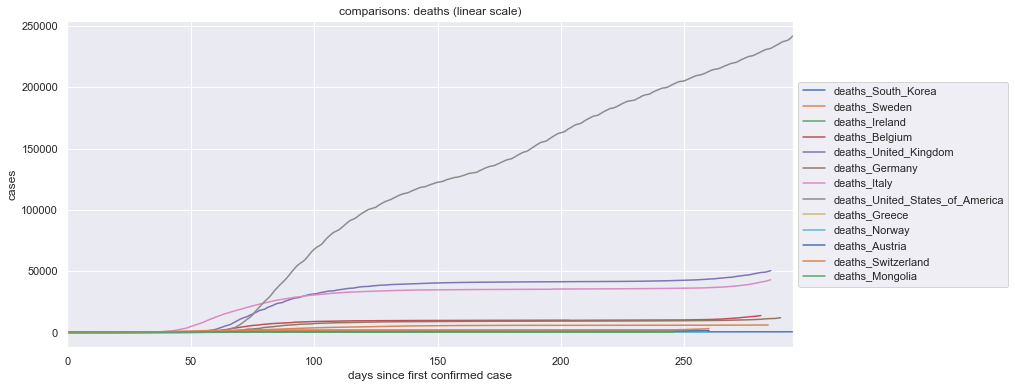

In [28]:
__df = _df[[
    'deaths_South_Korea',
    'deaths_Sweden',
    'deaths_Ireland',
    'deaths_Belgium',
    'deaths_United_Kingdom',
    'deaths_Germany',
    'deaths_Italy',
    'deaths_United_States_of_America',
    'deaths_Greece',
    'deaths_Norway',
    'deaths_Austria',
    'deaths_Switzerland',
    'deaths_Mongolia']]
display(__df.tail())

title = 'comparisons: deaths'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

deaths_Sweden  deaths_Belgium  deaths_Ireland  deaths_United_Kingdom  \
290            NaN             NaN             NaN                    NaN   
291            NaN             NaN             NaN                    NaN   
292            NaN             NaN             NaN                    NaN   
293            NaN             NaN             NaN                    NaN   
294            NaN             NaN             NaN                    NaN   

     deaths_Germany  deaths_Italy  deaths_Greece  deaths_Norway  \
290             NaN           NaN            NaN            NaN   
291             NaN           NaN            NaN            NaN   
292             NaN           NaN            NaN            NaN   
293             NaN           NaN            NaN            NaN   
294             NaN           NaN            NaN            NaN   

     deaths_Austria  deaths_Switzerland  
290             NaN                 NaN  
291             NaN                 NaN  
292             NaN                 NaN  
293             NaN                 NaN  
294             NaN                 NaN

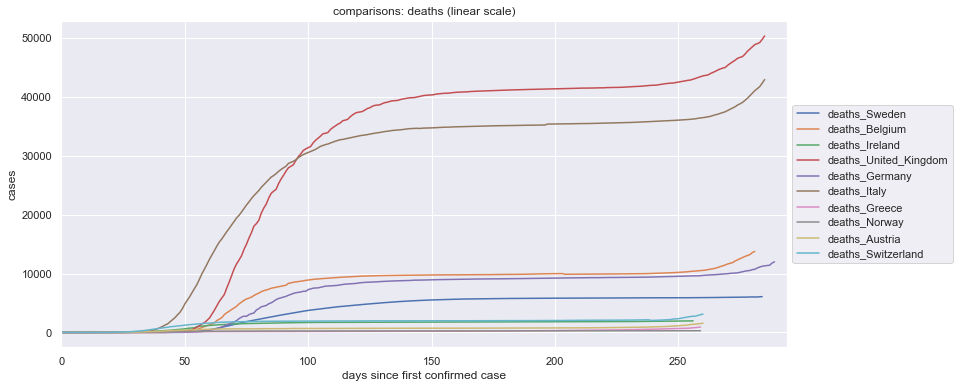

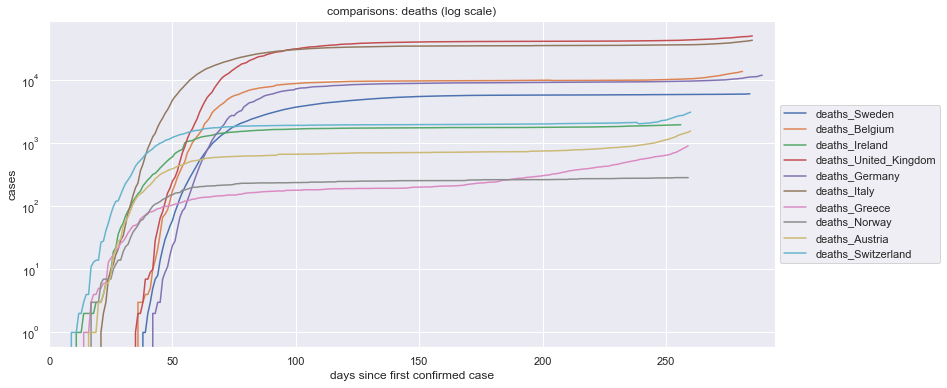

In [29]:
# some European countries
__df = _df[[
    'deaths_Sweden',
    'deaths_Belgium',
    'deaths_Ireland',
    'deaths_United_Kingdom',
    'deaths_Germany',
    'deaths_Italy',
    'deaths_Greece',
    'deaths_Norway',
    'deaths_Austria',
    'deaths_Switzerland']]
display(__df.tail())

title = 'comparisons: deaths'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

# comparisons: new deaths

deaths_new_cases_South_Korea  deaths_new_cases_Sweden  \
290                           1.0                      NaN   
291                           2.0                      NaN   
292                           5.0                      NaN   
293                           2.0                      NaN   
294                           NaN                      NaN   

     deaths_new_cases_Ireland  deaths_new_cases_Belgium  \
290                       NaN                       NaN   
291                       NaN                       NaN   
292                       NaN                       NaN   
293                       NaN                       NaN   
294                       NaN                       NaN   

     deaths_new_cases_United_Kingdom  deaths_new_cases_Germany  \
290                              NaN                       NaN   
291                              NaN                       NaN   
292                              NaN                       NaN   
293                              NaN                       NaN   
294                              NaN                       NaN   

     deaths_new_cases_Italy  deaths_new_cases_United_States_of_America  \
290                     NaN                                     1036.0   
291                     NaN                                      462.0   
292                     NaN                                      690.0   
293                     NaN                                     1436.0   
294                     NaN                                     2005.0   

     deaths_new_cases_Greece  deaths_new_cases_Norway  \
290                      NaN                      NaN   
291                      NaN                      NaN   
292                      NaN                      NaN   
293                      NaN                      NaN   
294                      NaN                      NaN   

     deaths_new_cases_Austria  deaths_new_cases_Switzerland  \
290                       NaN                           NaN   
291                       NaN                           NaN   
292                       NaN                           NaN   
293                       NaN                           NaN   
294                       NaN                           NaN   

     deaths_new_cases_Mongolia  deaths_new_cases_South_Africa  
290                        NaN                            NaN  
291                        NaN                            NaN  
292                        NaN                            NaN  
293                        NaN                            NaN  
294                        NaN                            NaN

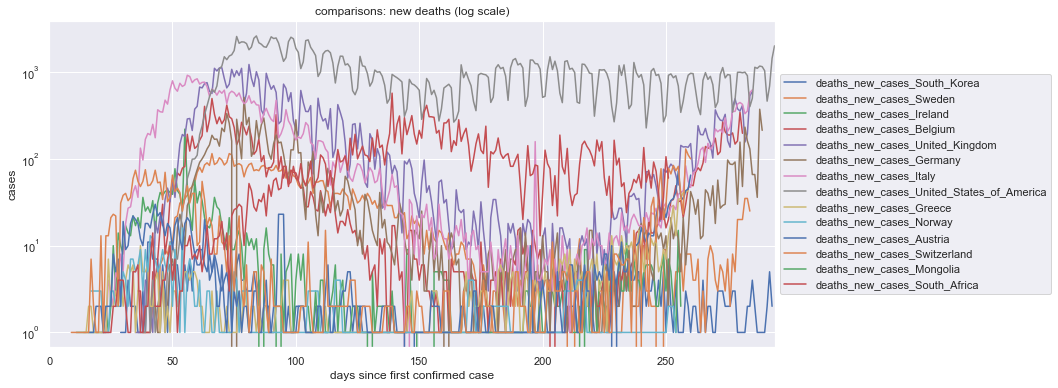

In [30]:
__df = _df[[
    'deaths_new_cases_South_Korea',
    'deaths_new_cases_Sweden',
    'deaths_new_cases_Ireland',
    'deaths_new_cases_Belgium',
    'deaths_new_cases_United_Kingdom',
    'deaths_new_cases_Germany',
    'deaths_new_cases_Italy',
    'deaths_new_cases_United_States_of_America',
    'deaths_new_cases_Greece',
    'deaths_new_cases_Norway',
    'deaths_new_cases_Austria',
    'deaths_new_cases_Switzerland',
    'deaths_new_cases_Mongolia',
    'deaths_new_cases_South_Africa']]
display(__df.tail())

title = 'comparisons: new deaths'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

deaths_new_cases_Sweden  deaths_new_cases_Belgium  \
290                      NaN                       NaN   
291                      NaN                       NaN   
292                      NaN                       NaN   
293                      NaN                       NaN   
294                      NaN                       NaN   

     deaths_new_cases_Ireland  deaths_new_cases_United_Kingdom  \
290                       NaN                              NaN   
291                       NaN                              NaN   
292                       NaN                              NaN   
293                       NaN                              NaN   
294                       NaN                              NaN   

     deaths_new_cases_Germany  deaths_new_cases_Italy  \
290                       NaN                     NaN   
291                       NaN                     NaN   
292                       NaN                     NaN   
293                       NaN                     NaN   
294                       NaN                     NaN   

     deaths_new_cases_Greece  deaths_new_cases_Norway  \
290                      NaN                      NaN   
291                      NaN                      NaN   
292                      NaN                      NaN   
293                      NaN                      NaN   
294                      NaN                      NaN   

     deaths_new_cases_Austria  deaths_new_cases_Switzerland  
290                       NaN                           NaN  
291                       NaN                           NaN  
292                       NaN                           NaN  
293                       NaN                           NaN  
294                       NaN                           NaN

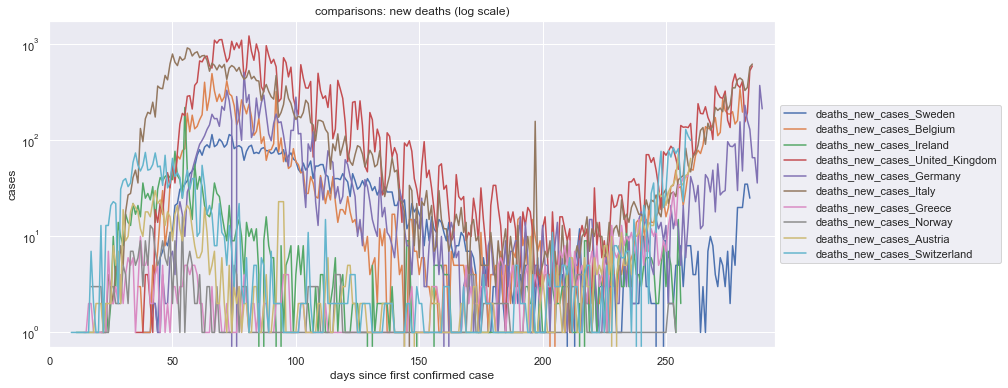

In [31]:
# European
__df = _df[[
    'deaths_new_cases_Sweden',
    'deaths_new_cases_Belgium',
    'deaths_new_cases_Ireland',
    'deaths_new_cases_United_Kingdom',
    'deaths_new_cases_Germany',
    'deaths_new_cases_Italy',
    'deaths_new_cases_Greece',
    'deaths_new_cases_Norway',
    'deaths_new_cases_Austria',
    'deaths_new_cases_Switzerland']]
display(__df.tail())

title = 'comparisons: new deaths'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

# comparisons: changes in confirmed cases

confirmed_percentage_change_South_Korea  \
290                                 0.524117   
291                                 0.459401   
292                                 0.362937   
293                                 0.527972   
294                                 0.514407   

     confirmed_percentage_change_Sweden  confirmed_percentage_change_Ireland  \
290                                 NaN                                  NaN   
291                                 NaN                                  NaN   
292                                 NaN                                  NaN   
293                                 NaN                                  NaN   
294                                 NaN                                  NaN   

     confirmed_percentage_change_Belgium  \
290                                  NaN   
291                                  NaN   
292                                  NaN   
293                                  NaN   
294                                  NaN   

     confirmed_percentage_change_United_Kingdom  \
290                                         NaN   
291                                         NaN   
292                                         NaN   
293                                         NaN   
294                                         NaN   

     confirmed_percentage_change_Germany  confirmed_percentage_change_Italy  \
290                                  NaN                                NaN   
291                                  NaN                                NaN   
292                                  NaN                                NaN   
293                                  NaN                                NaN   
294                                  NaN                                NaN   

     confirmed_percentage_change_United_States_of_America  \
290                                           1.316593      
291                                           1.110450      
292                                           1.199937      
293                                           1.386840      
294                                           1.396545      

     confirmed_percentage_change_Greece  confirmed_percentage_change_Norway  \
290                                 NaN                                 NaN   
291                                 NaN                                 NaN   
292                                 NaN                                 NaN   
293                                 NaN                                 NaN   
294                                 NaN                                 NaN   

     confirmed_percentage_change_Austria  \
290                                  NaN   
291                                  NaN   
292                                  NaN   
293                                  NaN   
294                                  NaN   

     confirmed_percentage_change_Switzerland  \
290                                      NaN   
291                                      NaN   
292                                      NaN   
293                                      NaN   
294                                      NaN   

     confirmed_percentage_change_Mongolia  \
290                                   NaN   
291                                   NaN   
292                                   NaN   
293                                   NaN   
294                                   NaN   

     confirmed_percentage_change_South_Africa  
290                                       NaN  
291                                       NaN  
292                                       NaN  
293                                       NaN  
294                                       NaN

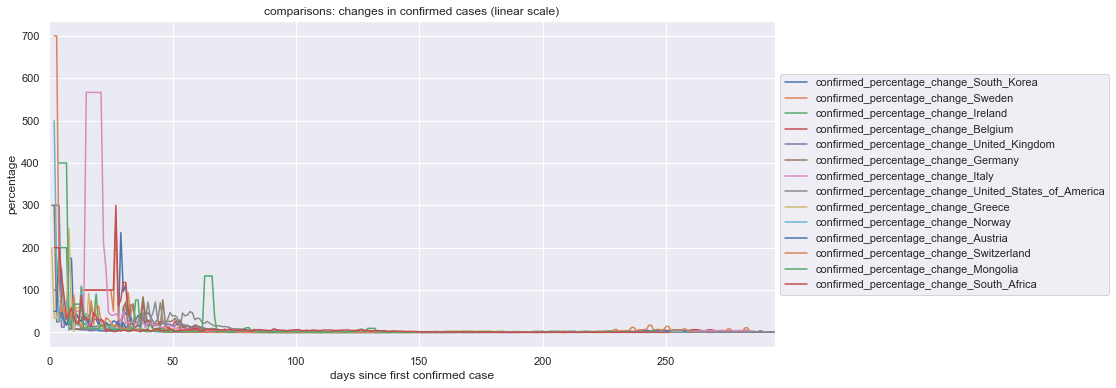

In [32]:
__df = _df[[
    'confirmed_percentage_change_South_Korea',
    'confirmed_percentage_change_Sweden',
    'confirmed_percentage_change_Ireland',
    'confirmed_percentage_change_Belgium',
    'confirmed_percentage_change_United_Kingdom',
    'confirmed_percentage_change_Germany',
    'confirmed_percentage_change_Italy',
    'confirmed_percentage_change_United_States_of_America',
    'confirmed_percentage_change_Greece',
    'confirmed_percentage_change_Norway',
    'confirmed_percentage_change_Austria',
    'confirmed_percentage_change_Switzerland',
    'confirmed_percentage_change_Mongolia',
    'confirmed_percentage_change_South_Africa']]
display(__df.tail())

title = 'comparisons: changes in confirmed cases'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');

In [33]:
___df = _df[[
    'deaths_percentage_change_South_Korea',
    'deaths_percentage_change_Sweden',
    'deaths_percentage_change_Ireland',
    'deaths_percentage_change_Belgium',
    'deaths_percentage_change_United_Kingdom',
    'deaths_percentage_change_Germany',
    'deaths_percentage_change_Italy',
    'deaths_percentage_change_United_States_of_America',
    'deaths_percentage_change_Greece',
    'deaths_percentage_change_Norway',
    'deaths_percentage_change_Austria',
    'deaths_percentage_change_Switzerland',
    'deaths_percentage_change_Mongolia',
    'deaths_percentage_change_South_Africa']]
display(___df.tail())

title = 'comparisons: changes in deaths'
___df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');
___df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');

deaths_percentage_change_South_Korea  deaths_percentage_change_Sweden  \
290                              0.209644                              NaN   
291                              0.418410                              NaN   
292                              1.041667                              NaN   
293                              0.412371                              NaN   
294                                   NaN                              NaN   

     deaths_percentage_change_Ireland  deaths_percentage_change_Belgium  \
290                               NaN                               NaN   
291                               NaN                               NaN   
292                               NaN                               NaN   
293                               NaN                               NaN   
294                               NaN                               NaN   

     deaths_percentage_change_United_Kingdom  \
290                                      NaN   
291                                      NaN   
292                                      NaN   
293                                      NaN   
294                                      NaN   

     deaths_percentage_change_Germany  deaths_percentage_change_Italy  \
290                               NaN                             NaN   
291                               NaN                             NaN   
292                               NaN                             NaN   
293                               NaN                             NaN   
294                               NaN                             NaN   

     deaths_percentage_change_United_States_of_America  \
290                                           0.438461   
291                                           0.194676   
292                                           0.290185   
293                                           0.602175   
294                                           0.835747   

     deaths_percentage_change_Greece  deaths_percentage_change_Norway  \
290                              NaN                              NaN   
291                              NaN                              NaN   
292                              NaN                              NaN   
293                              NaN                              NaN   
294                              NaN                              NaN   

     deaths_percentage_change_Austria  deaths_percentage_change_Switzerland  \
290                               NaN                                   NaN   
291                               NaN                                   NaN   
292                               NaN                                   NaN   
293                               NaN                                   NaN   
294                               NaN                                   NaN   

     deaths_percentage_change_Mongolia  deaths_percentage_change_South_Africa  
290                                NaN                                    NaN  
291                                NaN                                    NaN  
292                                NaN                                    NaN  
293                                NaN                                    NaN  
294                                NaN                                    NaN

In [34]:
# some European countries
___df = _df[[
    'deaths_percentage_change_Sweden',
    'deaths_percentage_change_Belgium',
    'deaths_percentage_change_Ireland',
    'deaths_percentage_change_United_Kingdom',
    'deaths_percentage_change_Germany',
    'deaths_percentage_change_Italy',
    'deaths_percentage_change_Greece',
    'deaths_percentage_change_Norway',
    'deaths_percentage_change_Austria',
    'deaths_percentage_change_Switzerland']]
display(___df.tail())

title = 'comparisons: changes in deaths'
___df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');
___df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');

deaths_percentage_change_Sweden  deaths_percentage_change_Belgium  \
290                              NaN                               NaN   
291                              NaN                               NaN   
292                              NaN                               NaN   
293                              NaN                               NaN   
294                              NaN                               NaN   

     deaths_percentage_change_Ireland  \
290                               NaN   
291                               NaN   
292                               NaN   
293                               NaN   
294                               NaN   

     deaths_percentage_change_United_Kingdom  \
290                                      NaN   
291                                      NaN   
292                                      NaN   
293                                      NaN   
294                                      NaN   

     deaths_percentage_change_Germany  deaths_percentage_change_Italy  \
290                               NaN                             NaN   
291                               NaN                             NaN   
292                               NaN                             NaN   
293                               NaN                             NaN   
294                               NaN                             NaN   

     deaths_percentage_change_Greece  deaths_percentage_change_Norway  \
290                              NaN                              NaN   
291                              NaN                              NaN   
292                              NaN                              NaN   
293                              NaN                              NaN   
294                              NaN                              NaN   

     deaths_percentage_change_Austria  deaths_percentage_change_Switzerland  
290                               NaN                                   NaN  
291                               NaN                                   NaN  
292                               NaN                                   NaN  
293                               NaN                                   NaN  
294                               NaN                                   NaN